<center><h1>Masters_Daniel_HW7</h1></center>

Name: Daniel Masters
<br>
Github Username: damasters
<br>
USC ID: 6203966352
<br>
Late Days Used: 3

## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

Import packages

In [1]:
import pandas as pd
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import random
from scipy.spatial.distance import hamming
from scipy import stats as st
from scipy.spatial.distance import hamming

### (a) Download the Anuran Calls (MFCCs) Data Set

In [2]:
anuran_df = pd.read_csv('../data/Frogs_MFCCs.csv')
anuran_df
train_df, test_df = train_test_split(anuran_df, train_size=0.7, shuffle=True)

In [3]:
train_df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
1328,1.0,0.226748,0.308840,0.516344,0.087916,0.007190,-0.134610,0.015068,0.302254,-0.043666,...,0.186177,-0.096984,-0.128388,-0.074974,0.142878,0.212619,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,14
633,1.0,0.522348,0.718201,0.488126,-0.229501,0.056396,0.382184,-0.080178,-0.293744,0.237630,...,0.088997,0.121142,-0.093441,-0.032848,0.066521,-0.034630,Leptodactylidae,Adenomera,AdenomeraAndre,8
5606,1.0,0.434954,0.361357,0.221060,0.082167,0.126312,0.039812,-0.031167,0.067948,0.039084,...,0.026431,-0.006265,0.009710,-0.027619,-0.000959,0.065255,Hylidae,Hypsiboas,HypsiboasCordobae,40
5896,1.0,0.108442,0.403436,0.334807,0.160209,0.221720,0.077038,-0.157262,-0.045618,0.102745,...,0.104863,0.021257,0.018031,-0.017974,-0.076636,0.020623,Hylidae,Hypsiboas,HypsiboasCordobae,41
6182,1.0,0.584635,0.396653,0.209963,0.056951,0.141568,0.039699,-0.038882,0.086732,0.073185,...,-0.032619,-0.021346,0.059515,-0.009325,-0.000359,0.063773,Hylidae,Hypsiboas,HypsiboasCordobae,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3806,1.0,0.421129,0.384946,0.577403,0.164125,0.058570,-0.030305,0.031067,0.271620,0.114706,...,0.209176,-0.011060,-0.061955,-0.088864,0.008700,0.210909,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,22
3225,1.0,0.093211,-0.014894,0.444653,0.218826,0.083361,-0.081022,0.023475,0.219545,0.079246,...,0.225342,0.062111,-0.123209,-0.188078,-0.022648,0.183467,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,21
6309,1.0,0.544655,0.422319,0.219980,0.063791,0.131091,0.046022,-0.023186,0.110247,0.081855,...,-0.027763,0.015086,0.049331,-0.043880,-0.009125,0.068616,Hylidae,Hypsiboas,HypsiboasCordobae,42
2630,1.0,0.342927,0.365706,0.630354,0.132667,-0.063574,-0.109142,0.118062,0.345949,0.040458,...,0.120068,-0.061841,-0.059352,-0.072934,0.045944,0.144721,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,19


In [4]:
test_df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
2411,1.0,0.147027,0.137001,0.622013,0.247403,-0.029137,-0.114690,0.093093,0.221163,-0.071305,...,0.076035,-0.037296,-0.078538,-0.083929,0.119513,0.157491,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,18
5682,1.0,0.493535,0.423131,0.247821,0.027608,0.150273,0.059945,-0.051361,0.085261,0.108716,...,0.065716,-0.011326,-0.001308,0.025194,-0.015544,0.025955,Hylidae,Hypsiboas,HypsiboasCordobae,40
212,1.0,0.177941,0.056230,0.305815,0.372038,0.253424,0.071725,-0.227672,-0.095299,0.356714,...,-0.159833,-0.198784,-0.075630,0.112755,0.110808,-0.058990,Leptodactylidae,Adenomera,AdenomeraAndre,4
7014,1.0,0.368191,0.315427,0.251104,-0.016359,0.034577,0.160057,0.060006,-0.067722,0.017479,...,-0.012387,0.007011,0.018014,0.015120,0.004414,-0.000089,Bufonidae,Rhinella,Rhinellagranulosa,53
2819,1.0,0.453482,0.234711,0.660042,0.222252,0.070837,-0.107096,0.145087,0.311033,0.049203,...,0.119715,0.055413,0.034878,-0.167133,-0.051502,0.171287,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,1.0,0.392142,0.221507,0.330909,0.066336,0.056986,0.241803,0.065741,-0.171997,-0.071414,...,-0.172150,0.051977,0.035629,-0.064600,-0.032673,0.000100,Dendrobatidae,Ameerega,Ameeregatrivittata,13
834,1.0,0.187000,-0.055078,0.301032,0.414782,0.236580,-0.204445,-0.180241,0.189167,0.241540,...,-0.124405,0.039857,0.114045,0.038600,-0.005956,-0.068775,Dendrobatidae,Ameerega,Ameeregatrivittata,10
778,1.0,-0.175499,0.143653,0.602973,0.136911,-0.066209,0.026864,-0.002143,0.059232,0.099365,...,-0.099357,0.010353,0.108944,-0.004053,-0.089873,-0.001179,Dendrobatidae,Ameerega,Ameeregatrivittata,10
6824,1.0,0.186244,0.317880,0.390291,-0.074936,0.100475,0.300410,-0.049252,-0.147503,0.097955,...,0.140139,0.001249,-0.081252,0.103286,0.085105,-0.114595,Leptodactylidae,Leptodactylus,LeptodactylusFuscus,47


### (b) Train a classifier for each label

#### (i) Research exact match and hamming score/ loss methods for evaluating multi-label classification and use them in evaluating the classifiers in this problem.

Exact Match uses the concept of accuracy that is present in single label classification case and extends it to the multi-label classification case.  The disadvantage of this is that it does cannot tell the difference between completely incorrect and partially incorrect labels (which may be present in multiclass classification), thus it ignores labels that may be partially correct.

Hamming score/loss is more forgiving than exact match because it takes into account each instance's incorrectly predicted labels. More specifically the hamming score is the fraction of correctly predicted labels over total number of labels while the hamming loss is the number of incorrectly predicted labels over the total number of labels. The higher the hamming score and the lower the hamming loss translates to the better performance.

#### (ii) Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. You are welcome to try to solve the problem with both standardized and raw attributes and report the results.

In [5]:
X_train = train_df.iloc[:, :-4]
y_train = train_df.iloc[:, -4:]
x_test = test_df.iloc[:, :-4]
y_test = test_df.iloc[:, -4:]

In [6]:
#defining a parameter grid for SVM penalty and Gaussian is width

params={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
preds = []
true_labs = []
for i in ['Family', 'Genus', 'Species']:
    svm = SVC(kernel='rbf', decision_function_shape='ovr')
    kfold_cv = KFold(n_splits=10, shuffle=True)
    grid_cv = GridSearchCV(svm, param_grid=params, cv=kfold_cv, scoring='accuracy', n_jobs=-1)
    grid_cv.fit(X_train, train_df[i])
    pred_svm = grid_cv.predict(x_test)
    preds.append(pred_svm)
    best_params = grid_cv.best_params_
    print('The best parameters for '+str(i)+' are: '+str(best_params)+' The C corresponds to the SVM penalty and the Gamma corresponds to the width of the Gaussian Kernel.')
    y_true = y_test[i]
    true_labs.append(y_true.values)
    ham_score = hamming_loss(y_true, pred_svm)
    print('The hamming score for '+str(i)+ ' is: '+str(1-ham_score))
    exact_match = accuracy_score(y_true, pred_svm)
    print('The exact match score for ' +str(i)+' is: '+str(exact_match)+'\n') 

The best parameters for Family are: {'C': 100, 'gamma': 1} The C corresponds to the SVM penalty and the Gamma corresponds to the width of the Gaussian Kernel.
The hamming score for Family is: 0.9925891616489115
The exact match score for Family is: 0.9925891616489115

The best parameters for Genus are: {'C': 100, 'gamma': 1} The C corresponds to the SVM penalty and the Gamma corresponds to the width of the Gaussian Kernel.
The hamming score for Genus is: 0.9911996294580825
The exact match score for Genus is: 0.9911996294580825

The best parameters for Species are: {'C': 10, 'gamma': 1} The C corresponds to the SVM penalty and the Gamma corresponds to the width of the Gaussian Kernel.
The hamming score for Species is: 0.9921259842519685
The exact match score for Species is: 0.9921259842519685



In [7]:
n_samples = len(preds[0])
n_labels = 3
count= 0
for nrows in range(len(preds[0])):
    for i in range(3):
        if preds[i][nrows] != true_labs[i][nrows]:
            count += 1
ham_loss = count/(n_samples*n_labels)
print('The overall hamming score is: '+str(1-ham_loss))
new_count= 0
new_array = np.array(true_labs)
for i in range(len(preds[0])):
    if (new_array[:, i] == np.array(preds)[:,i]).all():
        new_count += 1
exact_score_new = new_count/n_samples
print('The overall exact match score overall is: '+str(exact_score_new))      

The overall hamming score is: 0.9919715917863208
The overall exact match score overall is: 0.9865678554886521


#### (iii) Repeat 1(b)ii with L1-penalized SVMs.  Remember to standardize the attributes. Determine the weight of the SVM penalty using 10 fold cross validation.

In [8]:
params_2={'C': [0.001, 0.01, 0.1, 1, 10, 100]}
scale = StandardScaler()
stand_x_train = scale.fit_transform(X_train)
stand_x_test = scale.transform(x_test)
preds_2 = []
true_labs_2 = []
for i in ['Family', 'Genus', 'Species']:
    svm_2 = LinearSVC(penalty='l1', multi_class='ovr', loss='squared_hinge', dual=False, max_iter=10000)
    kfold_cv_2 = KFold(n_splits=10, shuffle=True)
    grid_cv_2 = GridSearchCV(svm_2, param_grid=params_2, cv=kfold_cv_2, scoring='accuracy', n_jobs=-1)
    grid_cv_2.fit(stand_x_train, train_df[i])
    pred_svm_2 = grid_cv_2.predict(stand_x_test)
    preds_2.append(pred_svm_2)
    best_params_2 = grid_cv_2.best_params_
    print('The best parameters for '+str(i)+' are: '+str(best_params_2)+' The C corresponds to the weight of the SVM penalty.')
    y_true_2 = y_test[i]
    true_labs_2.append(y_true_2.values)
    ham_score_2 = hamming_loss(y_true_2, pred_svm_2)
    print('The hamming score for '+str(i)+ ' is: '+str(1-ham_score_2))
    exact_match_2 = accuracy_score(y_true_2, pred_svm_2)
    print('The exact match score for ' +str(i)+' is: '+str(exact_match_2)+'\n')

The best parameters for Family are: {'C': 1} The C corresponds to the weight of the SVM penalty.
The hamming score for Family is: 0.9402501157943493
The exact match score for Family is: 0.9402501157943493

The best parameters for Genus are: {'C': 100} The C corresponds to the weight of the SVM penalty.
The hamming score for Genus is: 0.9573876794812413
The exact match score for Genus is: 0.9573876794812413

The best parameters for Species are: {'C': 1} The C corresponds to the weight of the SVM penalty.
The hamming score for Species is: 0.9629458082445577
The exact match score for Species is: 0.9629458082445577



In [9]:
n_samples_2 = len(preds_2[0])
n_labels_2 = 3
count_2= 0
for nrows in range(len(preds_2[0])):
    for i in range(3):
        if preds_2[i][nrows] != true_labs_2[i][nrows]:
            count_2 += 1
ham_loss_2 = count_2/(n_samples_2*n_labels_2)
print('The overall hamming score is: '+str(1-ham_loss_2))
new_count_2 = 0
new_array_2 = np.array(true_labs_2)
for i in range(len(preds_2[0])):
    if (new_array_2[:, i] == np.array(preds_2)[:,i]).all():
        new_count_2 += 1
exact_score_new_2 = new_count_2/n_samples_2
print('The overall exact match score overall is: '+str(exact_score_new_2))

The overall hamming score is: 0.9535278678400494
The overall exact match score overall is: 0.9226493747105141


#### (iv) Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

In [10]:
#formatting data for smote
#encoding string labels as integers
encoder=LabelEncoder()
params_3={'C': [0.001, 0.01, 0.1, 1, 10, 100]}
new_train_y = pd.DataFrame()
new_test_y = pd.DataFrame()
preds_3 = []
true_labs_3 = []
for i in ['Family', 'Genus', 'Species']:
    encode_labels_train = encoder.fit_transform(y_train[i])
    encode_labels_test = encoder.transform(y_test[i])
    new_train_y[i] = encode_labels_train
    new_test_y[i] = encode_labels_test
    sm = SMOTE(random_state=42)
    x_train_smote, y_train_smote = sm.fit_resample(stand_x_train, new_train_y[i])
    svm_3 = LinearSVC(penalty='l1', multi_class='ovr', loss='squared_hinge', dual=False, max_iter=100000)
    kfold_cv_3 = KFold(n_splits=10, shuffle=True)
    grid_cv_3 = GridSearchCV(svm_3, param_grid=params_3, cv=kfold_cv_3, scoring='accuracy', n_jobs=-1)
    grid_cv_3.fit(x_train_smote, y_train_smote)
    pred_svm_3 = grid_cv_3.predict(stand_x_test)
    preds_3.append(pred_svm_3)
    best_params_3 = grid_cv_3.best_params_
    print('The best parameters for '+str(i)+' are: '+str(best_params_3)+' The C corresponds to the weight of the SVM penalty.')
    #calculate hamming loss dictionary
    y_true_3 = new_test_y[i]
    true_labs_3.append(y_true_3.values)
    ham_score_3 = hamming_loss(y_true_3, pred_svm_3)
    print('The hamming score for '+str(i)+ ' is: '+str(1-ham_score_3))
    #calculate exact match score
    exact_match_3 = accuracy_score(y_true_3, pred_svm_3)
    print('The exact match score for ' +str(i)+' is: '+str(exact_match_3)+'\n')

The best parameters for Family are: {'C': 10} The C corresponds to the weight of the SVM penalty.
The hamming score for Family is: 0.9221861973135711
The exact match score for Family is: 0.9221861973135711

The best parameters for Genus are: {'C': 10} The C corresponds to the weight of the SVM penalty.
The hamming score for Genus is: 0.920796665122742
The exact match score for Genus is: 0.920796665122742

The best parameters for Species are: {'C': 10} The C corresponds to the weight of the SVM penalty.
The hamming score for Species is: 0.9573876794812413
The exact match score for Species is: 0.9573876794812413



In [11]:
n_samples_3 = len(preds_3[0])
n_labels_3 = 3
count_3 = 0
for nrows in range(len(preds_3[0])):
    for i in range(3):
        if preds_3[i][nrows] != true_labs_3[i][nrows]:
            count_3 += 1
ham_loss_3 = count_3/(n_samples_3*n_labels_3)
print('The overall hamming score is: '+str(1-ham_loss_3))
new_count_3 = 0
new_array_3 = np.array(true_labs_3)
for i in range(len(preds_3[0])):
    if (new_array_3[:, i] == np.array(preds_3)[:,i]).all():
        new_count_3 += 1
exact_score_new_3 = new_count_3/n_samples_3
print('The overall exact match score overall is: '+str(exact_score_new_3))

The overall hamming score is: 0.9334568473058514
The overall exact match score overall is: 0.8670680870773506


In [12]:
print('For the all classes it seems that the unbalanced and unstandardized SVM classifier has the best performance because it has the highest overall hamming score and highest overall exact match scores.')
print('The unbalanced and standardized L1-penalized SVM classifier produced the second best performance as it had the second highest overall hamming score and second highest overall exact match score across all classes.')
print('The balanced and standardized L1-penalized SVM classifier had the worst performance as it had the lowest overall hamming score and the lowest overall exact scores across all classes.')
print('\nThis makes sense because balancing the dataset may have led to loss of important information and thus losing the information needed to make accurate predictions.')
print('Standardizing the data can also result in loss of important information and intorduce bias.')
print('All of this negatively impacts the overall hamming score or overall exact match score because the model may no longer be able to generalize or capture the complexity of the data as well as the unbalanced or unstandardized models.')

For the all classes it seems that the unbalanced and unstandardized SVM classifier has the best performance because it has the highest overall hamming score and highest overall exact match scores.
The unbalanced and standardized L1-penalized SVM classifier produced the second best performance as it had the second highest overall hamming score and second highest overall exact match score across all classes.
The balanced and standardized L1-penalized SVM classifier had the worst performance as it had the lowest overall hamming score and the lowest overall exact scores across all classes.

This makes sense because balancing the dataset may have led to loss of important information and thus losing the information needed to make accurate predictions.
Standardizing the data can also result in loss of important information and intorduce bias.
All of this negatively impacts the overall hamming score or overall exact match score because the model may no longer be able to generalize or capture t

## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

### a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k∈ {1, 2, . . . , 50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know

### (b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.

### (c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters.

note: a)b)c) are all done in the cell below

In [13]:
anuran_X= anuran_df.iloc[:, :-4]
anuran_y= anuran_df.iloc[:, -4:]
#cannot start loop at 1 because silhouette score requires at least two clusters to compute the mean distance between points in a cluster
all_ham_dists = []
true_family = anuran_df.iloc[:, -4].values
true_species = anuran_df.iloc[:, -3].values
true_genus = anuran_df.iloc[:, -2].values
sil_scores = []
fam_cluster_list = []
spec_cluster_list = []
gen_cluster_list = []
for i in tqdm(range(50)):
#Calculating part a)
    sil_scores = []
    rand_num = random.randint(0, 100000)
    for i in range(2,51):
        k_means = KMeans(n_clusters=i, random_state=rand_num, n_init=10)
        pred_km = k_means.fit_predict(anuran_X)
        sil_score = silhouette_score(anuran_X, pred_km)
        sil_scores.append(sil_score)
    optimal_k = np.argmax(sil_scores) + 2
    print('The optimal k is: '+str(optimal_k)+'\n')
    k_means_2 = KMeans(n_clusters=optimal_k, random_state=rand_num, n_init=10)
    pred_km_2 = k_means_2.fit_predict(anuran_X)   

#Calculating part b)
    for i in range(optimal_k):
        df_hamming = pd.DataFrame(columns=["Majority Family", "Majority Genus", "Majority Species", "True Family", "True Genus", "True Species"])
        majority_labels = []
        ham_scores_fam = []
        ham_scores_spec = []
        ham_scores_gen = []

        cluster_labs = np.where(k_means_2.labels_ == i)[0]
        fam_cluster = true_family[cluster_labs]
        fam_cluster_list.append(fam_cluster)
        spec_cluster = true_species[cluster_labs]
        spec_cluster_list.append(spec_cluster)
        gen_cluster = true_genus[cluster_labs]
        gen_cluster_list.append(gen_cluster)

        vals, counts = np.unique(fam_cluster, return_counts=True) #used fam cluster list[i], could use fam cluster
        mode_fam = vals[counts.argmax()]
        majority_labels.append(mode_fam)

        print('The most common occuring class in Family for cluster #'+str(i+1)+' is: '+str(mode_fam))
        vals_2, counts_2 = np.unique(spec_cluster, return_counts=True)
        mode_spec = vals_2[counts_2.argmax()]
        majority_labels.append(mode_spec)
        print('The most common occuring class in Species for cluster #'+str(i+1)+' is: '+str(mode_spec))
        vals_3, counts_3 = np.unique(gen_cluster, return_counts=True)
        mode_gen = vals_3[counts_3.argmax()]
        majority_labels.append(mode_gen)
        print('The most common occuring class in Genus for cluster #'+str(i+1)+' is: '+str(mode_gen))
    
#Calculating part C
        maj_labels_fam = []
        maj_labels_spec = []
        maj_labels_gen = []
        n_labels = 3
        cluster_len_fam = len(fam_cluster)
        cluster_len_spec = len(spec_cluster)
        cluster_len_gen = len(gen_cluster)
        for k in range(len(fam_cluster)):
            maj_labels_fam.append(mode_fam)
            maj_labels_spec.append(mode_spec)
            maj_labels_gen.append(mode_gen)

        df_hamming['Majority Family'] = maj_labels_fam
        df_hamming['Majority Genus'] = maj_labels_gen
        df_hamming['Majority Species'] = maj_labels_spec
        df_hamming['True Family'] = fam_cluster
        df_hamming['True Genus'] = gen_cluster
        df_hamming['True Species'] = spec_cluster

        hamming_distances = df_hamming.apply(lambda x: hamming(x[:3], x[3:]), axis=1)
        avg_hamming_dist = hamming_distances.sum()/(n_labels * cluster_len_fam)    
        print('The avg hamming distance for cluster #'+str(i+1)+' is: '+str(avg_hamming_dist))
        all_ham_dists.append(avg_hamming_dist)
        
        count_avg = 0
        for j in range(len(fam_cluster)):        
            if fam_cluster[j] == mode_fam:
                count_avg += 1
            if spec_cluster[j] == mode_spec:
                count_avg += 1
            if gen_cluster[j] == mode_gen:
                count_avg += 1
        ham_score_cluster = count_avg/(n_labels*cluster_len_fam)       
        ham_loss_cluster = 1-ham_score_cluster    
        print('The hamming score for cluster #'+str(i+1)+' is: '+str(ham_score_cluster))
        print('The hamming loss for cluster #'+str(i+1)+' is: '+str(ham_loss_cluster)+'\n')
        
monte_avg = np.mean(all_ham_dists) 
monte_std = np.std(all_ham_dists)
print('The Monte-Carlo Simulation average of the 50 Hamming Distances is: '+str(monte_avg))
print('The Monte-Carlo Simulation standard deviation of the 50 Hamming Distances is: '+str(monte_std))



  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

The optimal k is: 4

The most common occuring class in Family for cluster #1 is: Dendrobatidae
The most common occuring class in Species for cluster #1 is: Ameerega
The most common occuring class in Genus for cluster #1 is: Ameeregatrivittata
The avg hamming distance for cluster #1 is: 0.1716779825412221
The hamming score for cluster #1 is: 0.48496605237633367
The hamming loss for cluster #1 is: 0.5150339476236663

The most common occuring class in Family for cluster #2 is: Leptodactylidae
The most common occuring class in Species for cluster #2 is: Adenomera
The most common occuring class in Genus for cluster #2 is: AdenomeraHylaedactylus


  2%|█▋                                                                                 | 1/50 [00:41<34:04, 41.73s/it]

The avg hamming distance for cluster #2 is: 0.00949800697558545
The hamming score for cluster #2 is: 0.9715059790732437
The hamming loss for cluster #2 is: 0.028494020926756347

The most common occuring class in Family for cluster #3 is: Hylidae
The most common occuring class in Species for cluster #3 is: Hypsiboas
The most common occuring class in Genus for cluster #3 is: HypsiboasCordobae
The avg hamming distance for cluster #3 is: 0.14827895503980265
The hamming score for cluster #3 is: 0.555163134880592
The hamming loss for cluster #3 is: 0.444836865119408

The most common occuring class in Family for cluster #4 is: Hylidae
The most common occuring class in Species for cluster #4 is: Hypsiboas
The most common occuring class in Genus for cluster #4 is: HypsiboasCinerascens
The avg hamming distance for cluster #4 is: 0.04668838219326818
The hamming score for cluster #4 is: 0.8599348534201955
The hamming loss for cluster #4 is: 0.1400651465798045

The optimal k is: 4

The most common 

  4%|███▎                                                                               | 2/50 [01:23<33:23, 41.74s/it]

The avg hamming distance for cluster #4 is: 0.04668838219326818
The hamming score for cluster #4 is: 0.8599348534201955
The hamming loss for cluster #4 is: 0.1400651465798045

The optimal k is: 4

The most common occuring class in Family for cluster #1 is: Leptodactylidae
The most common occuring class in Species for cluster #1 is: Adenomera
The most common occuring class in Genus for cluster #1 is: AdenomeraHylaedactylus
The avg hamming distance for cluster #1 is: 0.00949800697558545
The hamming score for cluster #1 is: 0.9715059790732437
The hamming loss for cluster #1 is: 0.028494020926756347

The most common occuring class in Family for cluster #2 is: Hylidae
The most common occuring class in Species for cluster #2 is: Hypsiboas
The most common occuring class in Genus for cluster #2 is: HypsiboasCinerascens
The avg hamming distance for cluster #2 is: 0.04668838219326818
The hamming score for cluster #2 is: 0.8599348534201955
The hamming loss for cluster #2 is: 0.1400651465798045

T

  6%|████▉                                                                              | 3/50 [02:05<32:40, 41.71s/it]

The avg hamming distance for cluster #4 is: 0.14827895503980265
The hamming score for cluster #4 is: 0.555163134880592
The hamming loss for cluster #4 is: 0.444836865119408

The optimal k is: 4

The most common occuring class in Family for cluster #1 is: Leptodactylidae
The most common occuring class in Species for cluster #1 is: Adenomera
The most common occuring class in Genus for cluster #1 is: AdenomeraHylaedactylus
The avg hamming distance for cluster #1 is: 0.00949800697558545
The hamming score for cluster #1 is: 0.9715059790732437
The hamming loss for cluster #1 is: 0.028494020926756347

The most common occuring class in Family for cluster #2 is: Dendrobatidae
The most common occuring class in Species for cluster #2 is: Ameerega
The most common occuring class in Genus for cluster #2 is: Ameeregatrivittata
The avg hamming distance for cluster #2 is: 0.1716779825412221
The hamming score for cluster #2 is: 0.48496605237633367
The hamming loss for cluster #2 is: 0.5150339476236663



  8%|██████▋                                                                            | 4/50 [02:46<32:00, 41.74s/it]

The avg hamming distance for cluster #3 is: 0.14827895503980265
The hamming score for cluster #3 is: 0.555163134880592
The hamming loss for cluster #3 is: 0.444836865119408

The most common occuring class in Family for cluster #4 is: Hylidae
The most common occuring class in Species for cluster #4 is: Hypsiboas
The most common occuring class in Genus for cluster #4 is: HypsiboasCinerascens
The avg hamming distance for cluster #4 is: 0.04668838219326818
The hamming score for cluster #4 is: 0.8599348534201955
The hamming loss for cluster #4 is: 0.1400651465798045

The optimal k is: 4

The most common occuring class in Family for cluster #1 is: Hylidae
The most common occuring class in Species for cluster #1 is: Hypsiboas
The most common occuring class in Genus for cluster #1 is: HypsiboasCinerascens
The avg hamming distance for cluster #1 is: 0.04668838219326818
The hamming score for cluster #1 is: 0.8599348534201955
The hamming loss for cluster #1 is: 0.1400651465798045

The most common

 10%|████████▎                                                                          | 5/50 [03:27<31:04, 41.43s/it]

The avg hamming distance for cluster #2 is: 0.00949800697558545
The hamming score for cluster #2 is: 0.9715059790732437
The hamming loss for cluster #2 is: 0.028494020926756347

The most common occuring class in Family for cluster #3 is: Hylidae
The most common occuring class in Species for cluster #3 is: Hypsiboas
The most common occuring class in Genus for cluster #3 is: HypsiboasCordobae
The avg hamming distance for cluster #3 is: 0.14827895503980265
The hamming score for cluster #3 is: 0.555163134880592
The hamming loss for cluster #3 is: 0.444836865119408

The most common occuring class in Family for cluster #4 is: Dendrobatidae
The most common occuring class in Species for cluster #4 is: Ameerega
The most common occuring class in Genus for cluster #4 is: Ameeregatrivittata
The avg hamming distance for cluster #4 is: 0.1716779825412221
The hamming score for cluster #4 is: 0.48496605237633367
The hamming loss for cluster #4 is: 0.5150339476236663

The optimal k is: 4

The most comm

 12%|█████████▉                                                                         | 6/50 [04:08<30:08, 41.11s/it]

The avg hamming distance for cluster #4 is: 0.14827895503980265
The hamming score for cluster #4 is: 0.555163134880592
The hamming loss for cluster #4 is: 0.444836865119408

The optimal k is: 4

The most common occuring class in Family for cluster #1 is: Leptodactylidae
The most common occuring class in Species for cluster #1 is: Adenomera
The most common occuring class in Genus for cluster #1 is: AdenomeraAndre
The avg hamming distance for cluster #1 is: 0.13257229832572298
The hamming score for cluster #1 is: 0.602283105022831
The hamming loss for cluster #1 is: 0.397716894977169

The most common occuring class in Family for cluster #2 is: Leptodactylidae
The most common occuring class in Species for cluster #2 is: Adenomera
The most common occuring class in Genus for cluster #2 is: AdenomeraHylaedactylus
The avg hamming distance for cluster #2 is: 0.010521415270018621
The hamming score for cluster #2 is: 0.9684357541899441
The hamming loss for cluster #2 is: 0.0315642458100559

The 

 14%|███████████▌                                                                       | 7/50 [04:50<29:47, 41.57s/it]


The hamming score for cluster #4 is: 0.8261086198305929
The hamming loss for cluster #4 is: 0.17389138016940708

The optimal k is: 4

The most common occuring class in Family for cluster #1 is: Leptodactylidae
The most common occuring class in Species for cluster #1 is: Adenomera
The most common occuring class in Genus for cluster #1 is: AdenomeraHylaedactylus
The avg hamming distance for cluster #1 is: 0.00949800697558545
The hamming score for cluster #1 is: 0.9715059790732437
The hamming loss for cluster #1 is: 0.028494020926756347

The most common occuring class in Family for cluster #2 is: Hylidae
The most common occuring class in Species for cluster #2 is: Hypsiboas
The most common occuring class in Genus for cluster #2 is: HypsiboasCinerascens
The avg hamming distance for cluster #2 is: 0.04668838219326818
The hamming score for cluster #2 is: 0.8599348534201955
The hamming loss for cluster #2 is: 0.1400651465798045

The most common occuring class in Family for cluster #3 is: Hyl

 16%|█████████████▎                                                                     | 8/50 [05:32<29:10, 41.68s/it]

The avg hamming distance for cluster #4 is: 0.1716779825412221
The hamming score for cluster #4 is: 0.48496605237633367
The hamming loss for cluster #4 is: 0.5150339476236663

The optimal k is: 4

The most common occuring class in Family for cluster #1 is: Leptodactylidae
The most common occuring class in Species for cluster #1 is: Adenomera
The most common occuring class in Genus for cluster #1 is: AdenomeraHylaedactylus
The avg hamming distance for cluster #1 is: 0.00949800697558545
The hamming score for cluster #1 is: 0.9715059790732437
The hamming loss for cluster #1 is: 0.028494020926756347

The most common occuring class in Family for cluster #2 is: Hylidae
The most common occuring class in Species for cluster #2 is: Hypsiboas
The most common occuring class in Genus for cluster #2 is: HypsiboasCinerascens
The avg hamming distance for cluster #2 is: 0.04668838219326818
The hamming score for cluster #2 is: 0.8599348534201955
The hamming loss for cluster #2 is: 0.1400651465798045

T

 18%|██████████████▉                                                                    | 9/50 [06:14<28:30, 41.73s/it]

The avg hamming distance for cluster #4 is: 0.1716779825412221
The hamming score for cluster #4 is: 0.48496605237633367
The hamming loss for cluster #4 is: 0.5150339476236663

The optimal k is: 4

The most common occuring class in Family for cluster #1 is: Hylidae
The most common occuring class in Species for cluster #1 is: Hypsiboas
The most common occuring class in Genus for cluster #1 is: HypsiboasCinerascens
The avg hamming distance for cluster #1 is: 0.04668838219326818
The hamming score for cluster #1 is: 0.8599348534201955
The hamming loss for cluster #1 is: 0.1400651465798045

The most common occuring class in Family for cluster #2 is: Leptodactylidae
The most common occuring class in Species for cluster #2 is: Adenomera
The most common occuring class in Genus for cluster #2 is: AdenomeraHylaedactylus


 20%|████████████████▍                                                                 | 10/50 [06:56<27:51, 41.79s/it]

The avg hamming distance for cluster #2 is: 0.00949800697558545
The hamming score for cluster #2 is: 0.9715059790732437
The hamming loss for cluster #2 is: 0.028494020926756347

The most common occuring class in Family for cluster #3 is: Dendrobatidae
The most common occuring class in Species for cluster #3 is: Ameerega
The most common occuring class in Genus for cluster #3 is: Ameeregatrivittata
The avg hamming distance for cluster #3 is: 0.1716779825412221
The hamming score for cluster #3 is: 0.48496605237633367
The hamming loss for cluster #3 is: 0.5150339476236663

The most common occuring class in Family for cluster #4 is: Hylidae
The most common occuring class in Species for cluster #4 is: Hypsiboas
The most common occuring class in Genus for cluster #4 is: HypsiboasCordobae
The avg hamming distance for cluster #4 is: 0.14827895503980265
The hamming score for cluster #4 is: 0.555163134880592
The hamming loss for cluster #4 is: 0.444836865119408

The optimal k is: 4

The most comm

 22%|██████████████████                                                                | 11/50 [07:39<27:18, 42.02s/it]

The avg hamming distance for cluster #3 is: 0.14827895503980265
The hamming score for cluster #3 is: 0.555163134880592
The hamming loss for cluster #3 is: 0.444836865119408

The most common occuring class in Family for cluster #4 is: Hylidae
The most common occuring class in Species for cluster #4 is: Hypsiboas
The most common occuring class in Genus for cluster #4 is: HypsiboasCinerascens
The avg hamming distance for cluster #4 is: 0.04668838219326818
The hamming score for cluster #4 is: 0.8599348534201955
The hamming loss for cluster #4 is: 0.1400651465798045

The optimal k is: 4

The most common occuring class in Family for cluster #1 is: Hylidae
The most common occuring class in Species for cluster #1 is: Hypsiboas
The most common occuring class in Genus for cluster #1 is: HypsiboasCordobae
The avg hamming distance for cluster #1 is: 0.14827895503980265
The hamming score for cluster #1 is: 0.555163134880592
The hamming loss for cluster #1 is: 0.444836865119408

The most common occu

 24%|███████████████████▋                                                              | 12/50 [08:21<26:36, 42.00s/it]

The avg hamming distance for cluster #3 is: 0.04668838219326818
The hamming score for cluster #3 is: 0.8599348534201955
The hamming loss for cluster #3 is: 0.1400651465798045

The most common occuring class in Family for cluster #4 is: Dendrobatidae
The most common occuring class in Species for cluster #4 is: Ameerega
The most common occuring class in Genus for cluster #4 is: Ameeregatrivittata
The avg hamming distance for cluster #4 is: 0.1716779825412221
The hamming score for cluster #4 is: 0.48496605237633367
The hamming loss for cluster #4 is: 0.5150339476236663

The optimal k is: 4

The most common occuring class in Family for cluster #1 is: Hylidae
The most common occuring class in Species for cluster #1 is: Hypsiboas
The most common occuring class in Genus for cluster #1 is: HypsiboasCinerascens
The avg hamming distance for cluster #1 is: 0.04668838219326818
The hamming score for cluster #1 is: 0.8599348534201955
The hamming loss for cluster #1 is: 0.1400651465798045

The most c

 26%|█████████████████████▎                                                            | 13/50 [09:03<25:54, 42.03s/it]

The avg hamming distance for cluster #2 is: 0.00949800697558545
The hamming score for cluster #2 is: 0.9715059790732437
The hamming loss for cluster #2 is: 0.028494020926756347

The most common occuring class in Family for cluster #3 is: Hylidae
The most common occuring class in Species for cluster #3 is: Hypsiboas
The most common occuring class in Genus for cluster #3 is: HypsiboasCordobae
The avg hamming distance for cluster #3 is: 0.14827895503980265
The hamming score for cluster #3 is: 0.555163134880592
The hamming loss for cluster #3 is: 0.444836865119408

The most common occuring class in Family for cluster #4 is: Dendrobatidae
The most common occuring class in Species for cluster #4 is: Ameerega
The most common occuring class in Genus for cluster #4 is: Ameeregatrivittata
The avg hamming distance for cluster #4 is: 0.1716779825412221
The hamming score for cluster #4 is: 0.48496605237633367
The hamming loss for cluster #4 is: 0.5150339476236663

The optimal k is: 4

The most comm

 28%|██████████████████████▉                                                           | 14/50 [09:45<25:17, 42.14s/it]

The avg hamming distance for cluster #4 is: 0.14827895503980265
The hamming score for cluster #4 is: 0.555163134880592
The hamming loss for cluster #4 is: 0.444836865119408

The optimal k is: 4

The most common occuring class in Family for cluster #1 is: Leptodactylidae
The most common occuring class in Species for cluster #1 is: Adenomera
The most common occuring class in Genus for cluster #1 is: AdenomeraHylaedactylus
The avg hamming distance for cluster #1 is: 0.00949800697558545
The hamming score for cluster #1 is: 0.9715059790732437
The hamming loss for cluster #1 is: 0.028494020926756347

The most common occuring class in Family for cluster #2 is: Dendrobatidae
The most common occuring class in Species for cluster #2 is: Ameerega
The most common occuring class in Genus for cluster #2 is: Ameeregatrivittata
The avg hamming distance for cluster #2 is: 0.17117988394584138
The hamming score for cluster #2 is: 0.4864603481624758
The hamming loss for cluster #2 is: 0.5135396518375241



 30%|████████████████████████▌                                                         | 15/50 [10:27<24:33, 42.10s/it]

The avg hamming distance for cluster #3 is: 0.1479800526699165
The hamming score for cluster #3 is: 0.5560598419902505
The hamming loss for cluster #3 is: 0.4439401580097495

The most common occuring class in Family for cluster #4 is: Hylidae
The most common occuring class in Species for cluster #4 is: Hypsiboas
The most common occuring class in Genus for cluster #4 is: HypsiboasCinerascens
The avg hamming distance for cluster #4 is: 0.04571948998178506
The hamming score for cluster #4 is: 0.8628415300546448
The hamming loss for cluster #4 is: 0.1371584699453552

The optimal k is: 4

The most common occuring class in Family for cluster #1 is: Hylidae
The most common occuring class in Species for cluster #1 is: Hypsiboas
The most common occuring class in Genus for cluster #1 is: HypsiboasCordobae
The avg hamming distance for cluster #1 is: 0.206951316352086
The hamming score for cluster #1 is: 0.379146050943742
The hamming loss for cluster #1 is: 0.620853949056258

The most common occur

 32%|██████████████████████████▏                                                       | 16/50 [11:09<23:52, 42.15s/it]

The avg hamming distance for cluster #2 is: 0.008707865168539325
The hamming score for cluster #2 is: 0.9738764044943821
The hamming loss for cluster #2 is: 0.026123595505617936

The most common occuring class in Family for cluster #3 is: Leptodactylidae
The most common occuring class in Species for cluster #3 is: Adenomera
The most common occuring class in Genus for cluster #3 is: AdenomeraAndre
The avg hamming distance for cluster #3 is: 0.12729536258948024
The hamming score for cluster #3 is: 0.6181139122315593
The hamming loss for cluster #3 is: 0.3818860877684407

The most common occuring class in Family for cluster #4 is: Hylidae
The most common occuring class in Species for cluster #4 is: Hypsiboas
The most common occuring class in Genus for cluster #4 is: HypsiboasCordobae
The avg hamming distance for cluster #4 is: 0.08156886469046178
The hamming score for cluster #4 is: 0.7552934059286146
The hamming loss for cluster #4 is: 0.2447065940713854

The optimal k is: 4

The most co

 34%|███████████████████████████▉                                                      | 17/50 [11:51<23:10, 42.13s/it]

The avg hamming distance for cluster #4 is: 0.1716779825412221
The hamming score for cluster #4 is: 0.48496605237633367
The hamming loss for cluster #4 is: 0.5150339476236663

The optimal k is: 4

The most common occuring class in Family for cluster #1 is: Hylidae
The most common occuring class in Species for cluster #1 is: Hypsiboas
The most common occuring class in Genus for cluster #1 is: HypsiboasCinerascens
The avg hamming distance for cluster #1 is: 0.04571948998178506
The hamming score for cluster #1 is: 0.8628415300546448
The hamming loss for cluster #1 is: 0.1371584699453552

The most common occuring class in Family for cluster #2 is: Dendrobatidae
The most common occuring class in Species for cluster #2 is: Ameerega
The most common occuring class in Genus for cluster #2 is: Ameeregatrivittata
The avg hamming distance for cluster #2 is: 0.1713455953533398
The hamming score for cluster #2 is: 0.48596321393998065
The hamming loss for cluster #2 is: 0.5140367860600193

The most c

 36%|█████████████████████████████▌                                                    | 18/50 [12:33<22:27, 42.12s/it]

The avg hamming distance for cluster #3 is: 0.00949800697558545
The hamming score for cluster #3 is: 0.9715059790732437
The hamming loss for cluster #3 is: 0.028494020926756347

The most common occuring class in Family for cluster #4 is: Hylidae
The most common occuring class in Species for cluster #4 is: Hypsiboas
The most common occuring class in Genus for cluster #4 is: HypsiboasCordobae
The avg hamming distance for cluster #4 is: 0.14807347670250895
The hamming score for cluster #4 is: 0.5557795698924731
The hamming loss for cluster #4 is: 0.4442204301075269

The optimal k is: 4

The most common occuring class in Family for cluster #1 is: Leptodactylidae
The most common occuring class in Species for cluster #1 is: Adenomera
The most common occuring class in Genus for cluster #1 is: AdenomeraHylaedactylus
The avg hamming distance for cluster #1 is: 0.00949800697558545
The hamming score for cluster #1 is: 0.9715059790732437
The hamming loss for cluster #1 is: 0.028494020926756347

Th

 38%|███████████████████████████████▏                                                  | 19/50 [13:15<21:39, 41.90s/it]

The avg hamming distance for cluster #4 is: 0.14788653436483912
The hamming score for cluster #4 is: 0.5563403969054826
The hamming loss for cluster #4 is: 0.44365960309451735

The optimal k is: 4

The most common occuring class in Family for cluster #1 is: Leptodactylidae
The most common occuring class in Species for cluster #1 is: Adenomera
The most common occuring class in Genus for cluster #1 is: AdenomeraHylaedactylus
The avg hamming distance for cluster #1 is: 0.00949800697558545
The hamming score for cluster #1 is: 0.9715059790732437
The hamming loss for cluster #1 is: 0.028494020926756347

The most common occuring class in Family for cluster #2 is: Hylidae
The most common occuring class in Species for cluster #2 is: Hypsiboas
The most common occuring class in Genus for cluster #2 is: HypsiboasCordobae
The avg hamming distance for cluster #2 is: 0.14827895503980265
The hamming score for cluster #2 is: 0.555163134880592
The hamming loss for cluster #2 is: 0.444836865119408

The m

 40%|████████████████████████████████▊                                                 | 20/50 [13:57<20:56, 41.87s/it]

The avg hamming distance for cluster #4 is: 0.1716779825412221
The hamming score for cluster #4 is: 0.48496605237633367
The hamming loss for cluster #4 is: 0.5150339476236663

The optimal k is: 4

The most common occuring class in Family for cluster #1 is: Leptodactylidae
The most common occuring class in Species for cluster #1 is: Adenomera
The most common occuring class in Genus for cluster #1 is: AdenomeraHylaedactylus
The avg hamming distance for cluster #1 is: 0.00949800697558545
The hamming score for cluster #1 is: 0.9715059790732437
The hamming loss for cluster #1 is: 0.028494020926756347

The most common occuring class in Family for cluster #2 is: Dendrobatidae
The most common occuring class in Species for cluster #2 is: Ameerega
The most common occuring class in Genus for cluster #2 is: Ameeregatrivittata
The avg hamming distance for cluster #2 is: 0.1716779825412221
The hamming score for cluster #2 is: 0.48496605237633367
The hamming loss for cluster #2 is: 0.5150339476236663

 42%|██████████████████████████████████▍                                               | 21/50 [14:38<20:10, 41.73s/it]

The avg hamming distance for cluster #4 is: 0.04668838219326818
The hamming score for cluster #4 is: 0.8599348534201955
The hamming loss for cluster #4 is: 0.1400651465798045

The optimal k is: 4

The most common occuring class in Family for cluster #1 is: Hylidae
The most common occuring class in Species for cluster #1 is: Hypsiboas
The most common occuring class in Genus for cluster #1 is: HypsiboasCordobae
The avg hamming distance for cluster #1 is: 0.14809203142536476
The hamming score for cluster #1 is: 0.5557239057239057
The hamming loss for cluster #1 is: 0.44427609427609427

The most common occuring class in Family for cluster #2 is: Hylidae
The most common occuring class in Species for cluster #2 is: Hypsiboas
The most common occuring class in Genus for cluster #2 is: HypsiboasCinerascens
The avg hamming distance for cluster #2 is: 0.04715447154471544
The hamming score for cluster #2 is: 0.8585365853658536
The hamming loss for cluster #2 is: 0.14146341463414636

The most commo

 44%|████████████████████████████████████                                              | 22/50 [15:19<19:25, 41.64s/it]

The avg hamming distance for cluster #3 is: 0.00949800697558545
The hamming score for cluster #3 is: 0.9715059790732437
The hamming loss for cluster #3 is: 0.028494020926756347

The most common occuring class in Family for cluster #4 is: Dendrobatidae
The most common occuring class in Species for cluster #4 is: Ameerega
The most common occuring class in Genus for cluster #4 is: Ameeregatrivittata
The avg hamming distance for cluster #4 is: 0.17151162790697674
The hamming score for cluster #4 is: 0.48546511627906974
The hamming loss for cluster #4 is: 0.5145348837209303

The optimal k is: 4

The most common occuring class in Family for cluster #1 is: Hylidae
The most common occuring class in Species for cluster #1 is: Hypsiboas
The most common occuring class in Genus for cluster #1 is: HypsiboasCinerascens
The avg hamming distance for cluster #1 is: 0.04725829725829726
The hamming score for cluster #1 is: 0.8582251082251082
The hamming loss for cluster #1 is: 0.14177489177489178

The mo

 46%|█████████████████████████████████████▋                                            | 23/50 [16:01<18:45, 41.70s/it]

The avg hamming distance for cluster #3 is: 0.00949800697558545
The hamming score for cluster #3 is: 0.9715059790732437
The hamming loss for cluster #3 is: 0.028494020926756347

The most common occuring class in Family for cluster #4 is: Dendrobatidae
The most common occuring class in Species for cluster #4 is: Ameerega
The most common occuring class in Genus for cluster #4 is: Ameeregatrivittata
The avg hamming distance for cluster #4 is: 0.1716779825412221
The hamming score for cluster #4 is: 0.48496605237633367
The hamming loss for cluster #4 is: 0.5150339476236663

The optimal k is: 4

The most common occuring class in Family for cluster #1 is: Hylidae
The most common occuring class in Species for cluster #1 is: Hypsiboas
The most common occuring class in Genus for cluster #1 is: HypsiboasCinerascens
The avg hamming distance for cluster #1 is: 0.04668838219326818
The hamming score for cluster #1 is: 0.8599348534201955
The hamming loss for cluster #1 is: 0.1400651465798045

The most

 48%|███████████████████████████████████████▎                                          | 24/50 [16:43<18:03, 41.68s/it]

The avg hamming distance for cluster #3 is: 0.00949800697558545
The hamming score for cluster #3 is: 0.9715059790732437
The hamming loss for cluster #3 is: 0.028494020926756347

The most common occuring class in Family for cluster #4 is: Dendrobatidae
The most common occuring class in Species for cluster #4 is: Ameerega
The most common occuring class in Genus for cluster #4 is: Ameeregatrivittata
The avg hamming distance for cluster #4 is: 0.1716779825412221
The hamming score for cluster #4 is: 0.48496605237633367
The hamming loss for cluster #4 is: 0.5150339476236663

The optimal k is: 4

The most common occuring class in Family for cluster #1 is: Leptodactylidae
The most common occuring class in Species for cluster #1 is: Adenomera
The most common occuring class in Genus for cluster #1 is: AdenomeraHylaedactylus
The avg hamming distance for cluster #1 is: 0.00949800697558545
The hamming score for cluster #1 is: 0.9715059790732437
The hamming loss for cluster #1 is: 0.0284940209267563

 50%|█████████████████████████████████████████                                         | 25/50 [17:24<17:20, 41.62s/it]

The avg hamming distance for cluster #4 is: 0.1716779825412221
The hamming score for cluster #4 is: 0.48496605237633367
The hamming loss for cluster #4 is: 0.5150339476236663

The optimal k is: 4

The most common occuring class in Family for cluster #1 is: Leptodactylidae
The most common occuring class in Species for cluster #1 is: Adenomera
The most common occuring class in Genus for cluster #1 is: AdenomeraHylaedactylus
The avg hamming distance for cluster #1 is: 0.00949800697558545
The hamming score for cluster #1 is: 0.9715059790732437
The hamming loss for cluster #1 is: 0.028494020926756347

The most common occuring class in Family for cluster #2 is: Hylidae
The most common occuring class in Species for cluster #2 is: Hypsiboas
The most common occuring class in Genus for cluster #2 is: HypsiboasCordobae
The avg hamming distance for cluster #2 is: 0.14827895503980265
The hamming score for cluster #2 is: 0.555163134880592
The hamming loss for cluster #2 is: 0.444836865119408

The mo

 52%|██████████████████████████████████████████▋                                       | 26/50 [18:06<16:39, 41.65s/it]

The avg hamming distance for cluster #3 is: 0.1716779825412221
The hamming score for cluster #3 is: 0.48496605237633367
The hamming loss for cluster #3 is: 0.5150339476236663

The most common occuring class in Family for cluster #4 is: Hylidae
The most common occuring class in Species for cluster #4 is: Hypsiboas
The most common occuring class in Genus for cluster #4 is: HypsiboasCinerascens
The avg hamming distance for cluster #4 is: 0.04668838219326818
The hamming score for cluster #4 is: 0.8599348534201955
The hamming loss for cluster #4 is: 0.1400651465798045

The optimal k is: 4

The most common occuring class in Family for cluster #1 is: Hylidae
The most common occuring class in Species for cluster #1 is: Hypsiboas
The most common occuring class in Genus for cluster #1 is: HypsiboasCinerascens
The avg hamming distance for cluster #1 is: 0.04715447154471544
The hamming score for cluster #1 is: 0.8585365853658536
The hamming loss for cluster #1 is: 0.14146341463414636

The most com

 54%|████████████████████████████████████████████▎                                     | 27/50 [18:48<15:59, 41.70s/it]

The avg hamming distance for cluster #4 is: 0.1713455953533398
The hamming score for cluster #4 is: 0.48596321393998065
The hamming loss for cluster #4 is: 0.5140367860600193

The optimal k is: 4

The most common occuring class in Family for cluster #1 is: Hylidae
The most common occuring class in Species for cluster #1 is: Hypsiboas
The most common occuring class in Genus for cluster #1 is: HypsiboasCinerascens
The avg hamming distance for cluster #1 is: 0.04668838219326818
The hamming score for cluster #1 is: 0.8599348534201955
The hamming loss for cluster #1 is: 0.1400651465798045

The most common occuring class in Family for cluster #2 is: Leptodactylidae
The most common occuring class in Species for cluster #2 is: Adenomera
The most common occuring class in Genus for cluster #2 is: AdenomeraHylaedactylus


 56%|█████████████████████████████████████████████▉                                    | 28/50 [19:30<15:17, 41.69s/it]

The avg hamming distance for cluster #2 is: 0.00949800697558545
The hamming score for cluster #2 is: 0.9715059790732437
The hamming loss for cluster #2 is: 0.028494020926756347

The most common occuring class in Family for cluster #3 is: Hylidae
The most common occuring class in Species for cluster #3 is: Hypsiboas
The most common occuring class in Genus for cluster #3 is: HypsiboasCordobae
The avg hamming distance for cluster #3 is: 0.14827895503980265
The hamming score for cluster #3 is: 0.555163134880592
The hamming loss for cluster #3 is: 0.444836865119408

The most common occuring class in Family for cluster #4 is: Dendrobatidae
The most common occuring class in Species for cluster #4 is: Ameerega
The most common occuring class in Genus for cluster #4 is: Ameeregatrivittata
The avg hamming distance for cluster #4 is: 0.1716779825412221
The hamming score for cluster #4 is: 0.48496605237633367
The hamming loss for cluster #4 is: 0.5150339476236663

The optimal k is: 4

The most comm

 58%|███████████████████████████████████████████████▌                                  | 29/50 [20:11<14:35, 41.68s/it]

The avg hamming distance for cluster #2 is: 0.00949800697558545
The hamming score for cluster #2 is: 0.9715059790732437
The hamming loss for cluster #2 is: 0.028494020926756347

The most common occuring class in Family for cluster #3 is: Hylidae
The most common occuring class in Species for cluster #3 is: Hypsiboas
The most common occuring class in Genus for cluster #3 is: HypsiboasCordobae
The avg hamming distance for cluster #3 is: 0.14827895503980265
The hamming score for cluster #3 is: 0.555163134880592
The hamming loss for cluster #3 is: 0.444836865119408

The most common occuring class in Family for cluster #4 is: Hylidae
The most common occuring class in Species for cluster #4 is: Hypsiboas
The most common occuring class in Genus for cluster #4 is: HypsiboasCinerascens
The avg hamming distance for cluster #4 is: 0.04668838219326818
The hamming score for cluster #4 is: 0.8599348534201955
The hamming loss for cluster #4 is: 0.1400651465798045

The optimal k is: 4

The most common 

 60%|█████████████████████████████████████████████████▏                                | 30/50 [20:53<13:56, 41.84s/it]

The avg hamming distance for cluster #4 is: 0.00949800697558545
The hamming score for cluster #4 is: 0.9715059790732437
The hamming loss for cluster #4 is: 0.028494020926756347

The optimal k is: 4

The most common occuring class in Family for cluster #1 is: Dendrobatidae
The most common occuring class in Species for cluster #1 is: Ameerega
The most common occuring class in Genus for cluster #1 is: Ameeregatrivittata
The avg hamming distance for cluster #1 is: 0.1716779825412221
The hamming score for cluster #1 is: 0.48496605237633367
The hamming loss for cluster #1 is: 0.5150339476236663

The most common occuring class in Family for cluster #2 is: Leptodactylidae
The most common occuring class in Species for cluster #2 is: Adenomera
The most common occuring class in Genus for cluster #2 is: AdenomeraHylaedactylus


 62%|██████████████████████████████████████████████████▊                               | 31/50 [21:34<13:09, 41.58s/it]

The avg hamming distance for cluster #2 is: 0.00949800697558545
The hamming score for cluster #2 is: 0.9715059790732437
The hamming loss for cluster #2 is: 0.028494020926756347

The most common occuring class in Family for cluster #3 is: Hylidae
The most common occuring class in Species for cluster #3 is: Hypsiboas
The most common occuring class in Genus for cluster #3 is: HypsiboasCinerascens
The avg hamming distance for cluster #3 is: 0.04668838219326818
The hamming score for cluster #3 is: 0.8599348534201955
The hamming loss for cluster #3 is: 0.1400651465798045

The most common occuring class in Family for cluster #4 is: Hylidae
The most common occuring class in Species for cluster #4 is: Hypsiboas
The most common occuring class in Genus for cluster #4 is: HypsiboasCordobae
The avg hamming distance for cluster #4 is: 0.14827895503980265
The hamming score for cluster #4 is: 0.555163134880592
The hamming loss for cluster #4 is: 0.444836865119408

The optimal k is: 4

The most common 

 64%|████████████████████████████████████████████████████▍                             | 32/50 [22:16<12:28, 41.60s/it]

The avg hamming distance for cluster #4 is: 0.1716779825412221
The hamming score for cluster #4 is: 0.48496605237633367
The hamming loss for cluster #4 is: 0.5150339476236663

The optimal k is: 4

The most common occuring class in Family for cluster #1 is: Leptodactylidae
The most common occuring class in Species for cluster #1 is: Adenomera
The most common occuring class in Genus for cluster #1 is: AdenomeraHylaedactylus
The avg hamming distance for cluster #1 is: 0.00949800697558545
The hamming score for cluster #1 is: 0.9715059790732437
The hamming loss for cluster #1 is: 0.028494020926756347

The most common occuring class in Family for cluster #2 is: Hylidae
The most common occuring class in Species for cluster #2 is: Hypsiboas
The most common occuring class in Genus for cluster #2 is: HypsiboasCordobae
The avg hamming distance for cluster #2 is: 0.14827895503980265
The hamming score for cluster #2 is: 0.555163134880592
The hamming loss for cluster #2 is: 0.444836865119408

The mo

 66%|██████████████████████████████████████████████████████                            | 33/50 [22:58<11:50, 41.78s/it]

The avg hamming distance for cluster #4 is: 0.1716779825412221
The hamming score for cluster #4 is: 0.48496605237633367
The hamming loss for cluster #4 is: 0.5150339476236663

The optimal k is: 4

The most common occuring class in Family for cluster #1 is: Hylidae
The most common occuring class in Species for cluster #1 is: Hypsiboas
The most common occuring class in Genus for cluster #1 is: HypsiboasCordobae
The avg hamming distance for cluster #1 is: 0.14827895503980265
The hamming score for cluster #1 is: 0.555163134880592
The hamming loss for cluster #1 is: 0.444836865119408

The most common occuring class in Family for cluster #2 is: Leptodactylidae
The most common occuring class in Species for cluster #2 is: Adenomera
The most common occuring class in Genus for cluster #2 is: AdenomeraHylaedactylus


 68%|███████████████████████████████████████████████████████▊                          | 34/50 [23:40<11:08, 41.79s/it]

The avg hamming distance for cluster #2 is: 0.00949800697558545
The hamming score for cluster #2 is: 0.9715059790732437
The hamming loss for cluster #2 is: 0.028494020926756347

The most common occuring class in Family for cluster #3 is: Dendrobatidae
The most common occuring class in Species for cluster #3 is: Ameerega
The most common occuring class in Genus for cluster #3 is: Ameeregatrivittata
The avg hamming distance for cluster #3 is: 0.1716779825412221
The hamming score for cluster #3 is: 0.48496605237633367
The hamming loss for cluster #3 is: 0.5150339476236663

The most common occuring class in Family for cluster #4 is: Hylidae
The most common occuring class in Species for cluster #4 is: Hypsiboas
The most common occuring class in Genus for cluster #4 is: HypsiboasCinerascens
The avg hamming distance for cluster #4 is: 0.04668838219326818
The hamming score for cluster #4 is: 0.8599348534201955
The hamming loss for cluster #4 is: 0.1400651465798045

The optimal k is: 4

The most

 70%|█████████████████████████████████████████████████████████▍                        | 35/50 [24:22<10:27, 41.84s/it]

The avg hamming distance for cluster #4 is: 0.14788653436483912
The hamming score for cluster #4 is: 0.5563403969054826
The hamming loss for cluster #4 is: 0.44365960309451735

The optimal k is: 4

The most common occuring class in Family for cluster #1 is: Leptodactylidae
The most common occuring class in Species for cluster #1 is: Adenomera
The most common occuring class in Genus for cluster #1 is: AdenomeraHylaedactylus
The avg hamming distance for cluster #1 is: 0.00949800697558545
The hamming score for cluster #1 is: 0.9715059790732437
The hamming loss for cluster #1 is: 0.028494020926756347

The most common occuring class in Family for cluster #2 is: Dendrobatidae
The most common occuring class in Species for cluster #2 is: Ameerega
The most common occuring class in Genus for cluster #2 is: Ameeregatrivittata
The avg hamming distance for cluster #2 is: 0.1716779825412221
The hamming score for cluster #2 is: 0.48496605237633367
The hamming loss for cluster #2 is: 0.515033947623666

 72%|███████████████████████████████████████████████████████████                       | 36/50 [25:04<09:46, 41.86s/it]

The avg hamming distance for cluster #4 is: 0.1482603815937149
The hamming score for cluster #4 is: 0.5552188552188552
The hamming loss for cluster #4 is: 0.44478114478114483

The optimal k is: 4

The most common occuring class in Family for cluster #1 is: Dendrobatidae
The most common occuring class in Species for cluster #1 is: Ameerega
The most common occuring class in Genus for cluster #1 is: Ameeregatrivittata
The avg hamming distance for cluster #1 is: 0.1716779825412221
The hamming score for cluster #1 is: 0.48496605237633367
The hamming loss for cluster #1 is: 0.5150339476236663

The most common occuring class in Family for cluster #2 is: Leptodactylidae
The most common occuring class in Species for cluster #2 is: Adenomera
The most common occuring class in Genus for cluster #2 is: AdenomeraHylaedactylus


 74%|████████████████████████████████████████████████████████████▋                     | 37/50 [25:46<09:04, 41.92s/it]

The avg hamming distance for cluster #2 is: 0.00949800697558545
The hamming score for cluster #2 is: 0.9715059790732437
The hamming loss for cluster #2 is: 0.028494020926756347

The most common occuring class in Family for cluster #3 is: Hylidae
The most common occuring class in Species for cluster #3 is: Hypsiboas
The most common occuring class in Genus for cluster #3 is: HypsiboasCordobae
The avg hamming distance for cluster #3 is: 0.14827895503980265
The hamming score for cluster #3 is: 0.555163134880592
The hamming loss for cluster #3 is: 0.444836865119408

The most common occuring class in Family for cluster #4 is: Hylidae
The most common occuring class in Species for cluster #4 is: Hypsiboas
The most common occuring class in Genus for cluster #4 is: HypsiboasCinerascens
The avg hamming distance for cluster #4 is: 0.04668838219326818
The hamming score for cluster #4 is: 0.8599348534201955
The hamming loss for cluster #4 is: 0.1400651465798045

The optimal k is: 4

The most common 

 76%|██████████████████████████████████████████████████████████████▎                   | 38/50 [26:28<08:23, 41.93s/it]

The avg hamming distance for cluster #2 is: 0.00949800697558545
The hamming score for cluster #2 is: 0.9715059790732437
The hamming loss for cluster #2 is: 0.028494020926756347

The most common occuring class in Family for cluster #3 is: Hylidae
The most common occuring class in Species for cluster #3 is: Hypsiboas
The most common occuring class in Genus for cluster #3 is: HypsiboasCordobae
The avg hamming distance for cluster #3 is: 0.14827895503980265
The hamming score for cluster #3 is: 0.555163134880592
The hamming loss for cluster #3 is: 0.444836865119408

The most common occuring class in Family for cluster #4 is: Dendrobatidae
The most common occuring class in Species for cluster #4 is: Ameerega
The most common occuring class in Genus for cluster #4 is: Ameeregatrivittata
The avg hamming distance for cluster #4 is: 0.1716779825412221
The hamming score for cluster #4 is: 0.48496605237633367
The hamming loss for cluster #4 is: 0.5150339476236663

The optimal k is: 4

The most comm

 78%|███████████████████████████████████████████████████████████████▉                  | 39/50 [27:10<07:41, 41.91s/it]

The avg hamming distance for cluster #2 is: 0.00949800697558545
The hamming score for cluster #2 is: 0.9715059790732437
The hamming loss for cluster #2 is: 0.028494020926756347

The most common occuring class in Family for cluster #3 is: Hylidae
The most common occuring class in Species for cluster #3 is: Hypsiboas
The most common occuring class in Genus for cluster #3 is: HypsiboasCinerascens
The avg hamming distance for cluster #3 is: 0.04725829725829726
The hamming score for cluster #3 is: 0.8582251082251082
The hamming loss for cluster #3 is: 0.14177489177489178

The most common occuring class in Family for cluster #4 is: Hylidae
The most common occuring class in Species for cluster #4 is: Hypsiboas
The most common occuring class in Genus for cluster #4 is: HypsiboasCordobae
The avg hamming distance for cluster #4 is: 0.1482603815937149
The hamming score for cluster #4 is: 0.5552188552188552
The hamming loss for cluster #4 is: 0.44478114478114483

The optimal k is: 4

The most comm

 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [27:52<07:00, 42.02s/it]

The avg hamming distance for cluster #3 is: 0.00949800697558545
The hamming score for cluster #3 is: 0.9715059790732437
The hamming loss for cluster #3 is: 0.028494020926756347

The most common occuring class in Family for cluster #4 is: Hylidae
The most common occuring class in Species for cluster #4 is: Hypsiboas
The most common occuring class in Genus for cluster #4 is: HypsiboasCinerascens
The avg hamming distance for cluster #4 is: 0.04668838219326818
The hamming score for cluster #4 is: 0.8599348534201955
The hamming loss for cluster #4 is: 0.1400651465798045

The optimal k is: 4

The most common occuring class in Family for cluster #1 is: Leptodactylidae
The most common occuring class in Species for cluster #1 is: Adenomera
The most common occuring class in Genus for cluster #1 is: AdenomeraHylaedactylus
The avg hamming distance for cluster #1 is: 0.00949800697558545
The hamming score for cluster #1 is: 0.9715059790732437
The hamming loss for cluster #1 is: 0.028494020926756347


 82%|███████████████████████████████████████████████████████████████████▏              | 41/50 [28:34<06:16, 41.86s/it]


The most common occuring class in Species for cluster #4 is: Hypsiboas
The most common occuring class in Genus for cluster #4 is: HypsiboasCinerascens
The avg hamming distance for cluster #4 is: 0.04668838219326818
The hamming score for cluster #4 is: 0.8599348534201955
The hamming loss for cluster #4 is: 0.1400651465798045

The optimal k is: 4

The most common occuring class in Family for cluster #1 is: Leptodactylidae
The most common occuring class in Species for cluster #1 is: Adenomera
The most common occuring class in Genus for cluster #1 is: AdenomeraHylaedactylus
The avg hamming distance for cluster #1 is: 0.00949800697558545
The hamming score for cluster #1 is: 0.9715059790732437
The hamming loss for cluster #1 is: 0.028494020926756347

The most common occuring class in Family for cluster #2 is: Hylidae
The most common occuring class in Species for cluster #2 is: Hypsiboas
The most common occuring class in Genus for cluster #2 is: HypsiboasCordobae
The avg hamming distance for

 84%|████████████████████████████████████████████████████████████████████▉             | 42/50 [29:14<05:31, 41.46s/it]

The avg hamming distance for cluster #4 is: 0.1716779825412221
The hamming score for cluster #4 is: 0.48496605237633367
The hamming loss for cluster #4 is: 0.5150339476236663

The optimal k is: 4

The most common occuring class in Family for cluster #1 is: Hylidae
The most common occuring class in Species for cluster #1 is: Hypsiboas
The most common occuring class in Genus for cluster #1 is: HypsiboasCordobae
The avg hamming distance for cluster #1 is: 0.14827895503980265
The hamming score for cluster #1 is: 0.555163134880592
The hamming loss for cluster #1 is: 0.444836865119408

The most common occuring class in Family for cluster #2 is: Leptodactylidae
The most common occuring class in Species for cluster #2 is: Adenomera
The most common occuring class in Genus for cluster #2 is: AdenomeraHylaedactylus


 86%|██████████████████████████████████████████████████████████████████████▌           | 43/50 [29:55<04:49, 41.31s/it]

The avg hamming distance for cluster #2 is: 0.00949800697558545
The hamming score for cluster #2 is: 0.9715059790732437
The hamming loss for cluster #2 is: 0.028494020926756347

The most common occuring class in Family for cluster #3 is: Dendrobatidae
The most common occuring class in Species for cluster #3 is: Ameerega
The most common occuring class in Genus for cluster #3 is: Ameeregatrivittata
The avg hamming distance for cluster #3 is: 0.1716779825412221
The hamming score for cluster #3 is: 0.48496605237633367
The hamming loss for cluster #3 is: 0.5150339476236663

The most common occuring class in Family for cluster #4 is: Hylidae
The most common occuring class in Species for cluster #4 is: Hypsiboas
The most common occuring class in Genus for cluster #4 is: HypsiboasCinerascens
The avg hamming distance for cluster #4 is: 0.04668838219326818
The hamming score for cluster #4 is: 0.8599348534201955
The hamming loss for cluster #4 is: 0.1400651465798045

The optimal k is: 4

The most

 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [30:36<04:07, 41.28s/it]


The hamming score for cluster #3 is: 0.555163134880592
The hamming loss for cluster #3 is: 0.444836865119408

The most common occuring class in Family for cluster #4 is: Hylidae
The most common occuring class in Species for cluster #4 is: Hypsiboas
The most common occuring class in Genus for cluster #4 is: HypsiboasCinerascens
The avg hamming distance for cluster #4 is: 0.04668838219326818
The hamming score for cluster #4 is: 0.8599348534201955
The hamming loss for cluster #4 is: 0.1400651465798045

The optimal k is: 4

The most common occuring class in Family for cluster #1 is: Hylidae
The most common occuring class in Species for cluster #1 is: Hypsiboas
The most common occuring class in Genus for cluster #1 is: HypsiboasCinerascens
The avg hamming distance for cluster #1 is: 0.04668838219326818
The hamming score for cluster #1 is: 0.8599348534201955
The hamming loss for cluster #1 is: 0.1400651465798045

The most common occuring class in Family for cluster #2 is: Leptodactylidae
Th

 90%|█████████████████████████████████████████████████████████████████████████▊        | 45/50 [31:19<03:27, 41.59s/it]

The avg hamming distance for cluster #2 is: 0.00949800697558545
The hamming score for cluster #2 is: 0.9715059790732437
The hamming loss for cluster #2 is: 0.028494020926756347

The most common occuring class in Family for cluster #3 is: Dendrobatidae
The most common occuring class in Species for cluster #3 is: Ameerega
The most common occuring class in Genus for cluster #3 is: Ameeregatrivittata
The avg hamming distance for cluster #3 is: 0.1716779825412221
The hamming score for cluster #3 is: 0.48496605237633367
The hamming loss for cluster #3 is: 0.5150339476236663

The most common occuring class in Family for cluster #4 is: Hylidae
The most common occuring class in Species for cluster #4 is: Hypsiboas
The most common occuring class in Genus for cluster #4 is: HypsiboasCordobae
The avg hamming distance for cluster #4 is: 0.14827895503980265
The hamming score for cluster #4 is: 0.555163134880592
The hamming loss for cluster #4 is: 0.444836865119408

The optimal k is: 4

The most comm

 92%|███████████████████████████████████████████████████████████████████████████▍      | 46/50 [32:01<02:47, 41.91s/it]

The avg hamming distance for cluster #2 is: 0.009588742567167895
The hamming score for cluster #2 is: 0.9712337722984963
The hamming loss for cluster #2 is: 0.02876622770150372

The most common occuring class in Family for cluster #3 is: Hylidae
The most common occuring class in Species for cluster #3 is: Hypsiboas
The most common occuring class in Genus for cluster #3 is: HypsiboasCinerascens
The avg hamming distance for cluster #3 is: 0.04725829725829726
The hamming score for cluster #3 is: 0.8582251082251082
The hamming loss for cluster #3 is: 0.14177489177489178

The most common occuring class in Family for cluster #4 is: Hylidae
The most common occuring class in Species for cluster #4 is: Hypsiboas
The most common occuring class in Genus for cluster #4 is: HypsiboasCordobae
The avg hamming distance for cluster #4 is: 0.1482603815937149
The hamming score for cluster #4 is: 0.5552188552188552
The hamming loss for cluster #4 is: 0.44478114478114483

The optimal k is: 4

The most comm

 94%|█████████████████████████████████████████████████████████████████████████████     | 47/50 [32:44<02:06, 42.14s/it]

The avg hamming distance for cluster #2 is: 0.00949800697558545
The hamming score for cluster #2 is: 0.9715059790732437
The hamming loss for cluster #2 is: 0.028494020926756347

The most common occuring class in Family for cluster #3 is: Dendrobatidae
The most common occuring class in Species for cluster #3 is: Ameerega
The most common occuring class in Genus for cluster #3 is: Ameeregatrivittata
The avg hamming distance for cluster #3 is: 0.17101449275362318
The hamming score for cluster #3 is: 0.48695652173913045
The hamming loss for cluster #3 is: 0.5130434782608695

The most common occuring class in Family for cluster #4 is: Hylidae
The most common occuring class in Species for cluster #4 is: Hypsiboas
The most common occuring class in Genus for cluster #4 is: HypsiboasCinerascens
The avg hamming distance for cluster #4 is: 0.04571948998178506
The hamming score for cluster #4 is: 0.8628415300546448
The hamming loss for cluster #4 is: 0.1371584699453552

The optimal k is: 4

The mos

 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [33:27<01:24, 42.29s/it]

The avg hamming distance for cluster #2 is: 0.00949800697558545
The hamming score for cluster #2 is: 0.9715059790732437
The hamming loss for cluster #2 is: 0.028494020926756347

The most common occuring class in Family for cluster #3 is: Hylidae
The most common occuring class in Species for cluster #3 is: Hypsiboas
The most common occuring class in Genus for cluster #3 is: HypsiboasCordobae
The avg hamming distance for cluster #3 is: 0.14827895503980265
The hamming score for cluster #3 is: 0.555163134880592
The hamming loss for cluster #3 is: 0.444836865119408

The most common occuring class in Family for cluster #4 is: Dendrobatidae
The most common occuring class in Species for cluster #4 is: Ameerega
The most common occuring class in Genus for cluster #4 is: Ameeregatrivittata
The avg hamming distance for cluster #4 is: 0.1716779825412221
The hamming score for cluster #4 is: 0.48496605237633367
The hamming loss for cluster #4 is: 0.5150339476236663

The optimal k is: 4

The most comm

 98%|████████████████████████████████████████████████████████████████████████████████▎ | 49/50 [34:09<00:42, 42.33s/it]


The hamming score for cluster #4 is: 0.48496605237633367
The hamming loss for cluster #4 is: 0.5150339476236663

The optimal k is: 4

The most common occuring class in Family for cluster #1 is: Hylidae
The most common occuring class in Species for cluster #1 is: Hypsiboas
The most common occuring class in Genus for cluster #1 is: HypsiboasCinerascens
The avg hamming distance for cluster #1 is: 0.04668838219326818
The hamming score for cluster #1 is: 0.8599348534201955
The hamming loss for cluster #1 is: 0.1400651465798045

The most common occuring class in Family for cluster #2 is: Leptodactylidae
The most common occuring class in Species for cluster #2 is: Adenomera
The most common occuring class in Genus for cluster #2 is: AdenomeraHylaedactylus
The avg hamming distance for cluster #2 is: 0.00949800697558545
The hamming score for cluster #2 is: 0.9715059790732437
The hamming loss for cluster #2 is: 0.028494020926756347

The most common occuring class in Family for cluster #3 is: Hyl

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [34:51<00:00, 41.84s/it]

The avg hamming distance for cluster #4 is: 0.1716779825412221
The hamming score for cluster #4 is: 0.48496605237633367
The hamming loss for cluster #4 is: 0.5150339476236663

The Monte-Carlo Simulation average of the 50 Hamming Distances is: 0.09424035381596259
The Monte-Carlo Simulation standard deviation of the 50 Hamming Distances is: 0.06775209709968005


## 3. ISLR 12.6.2

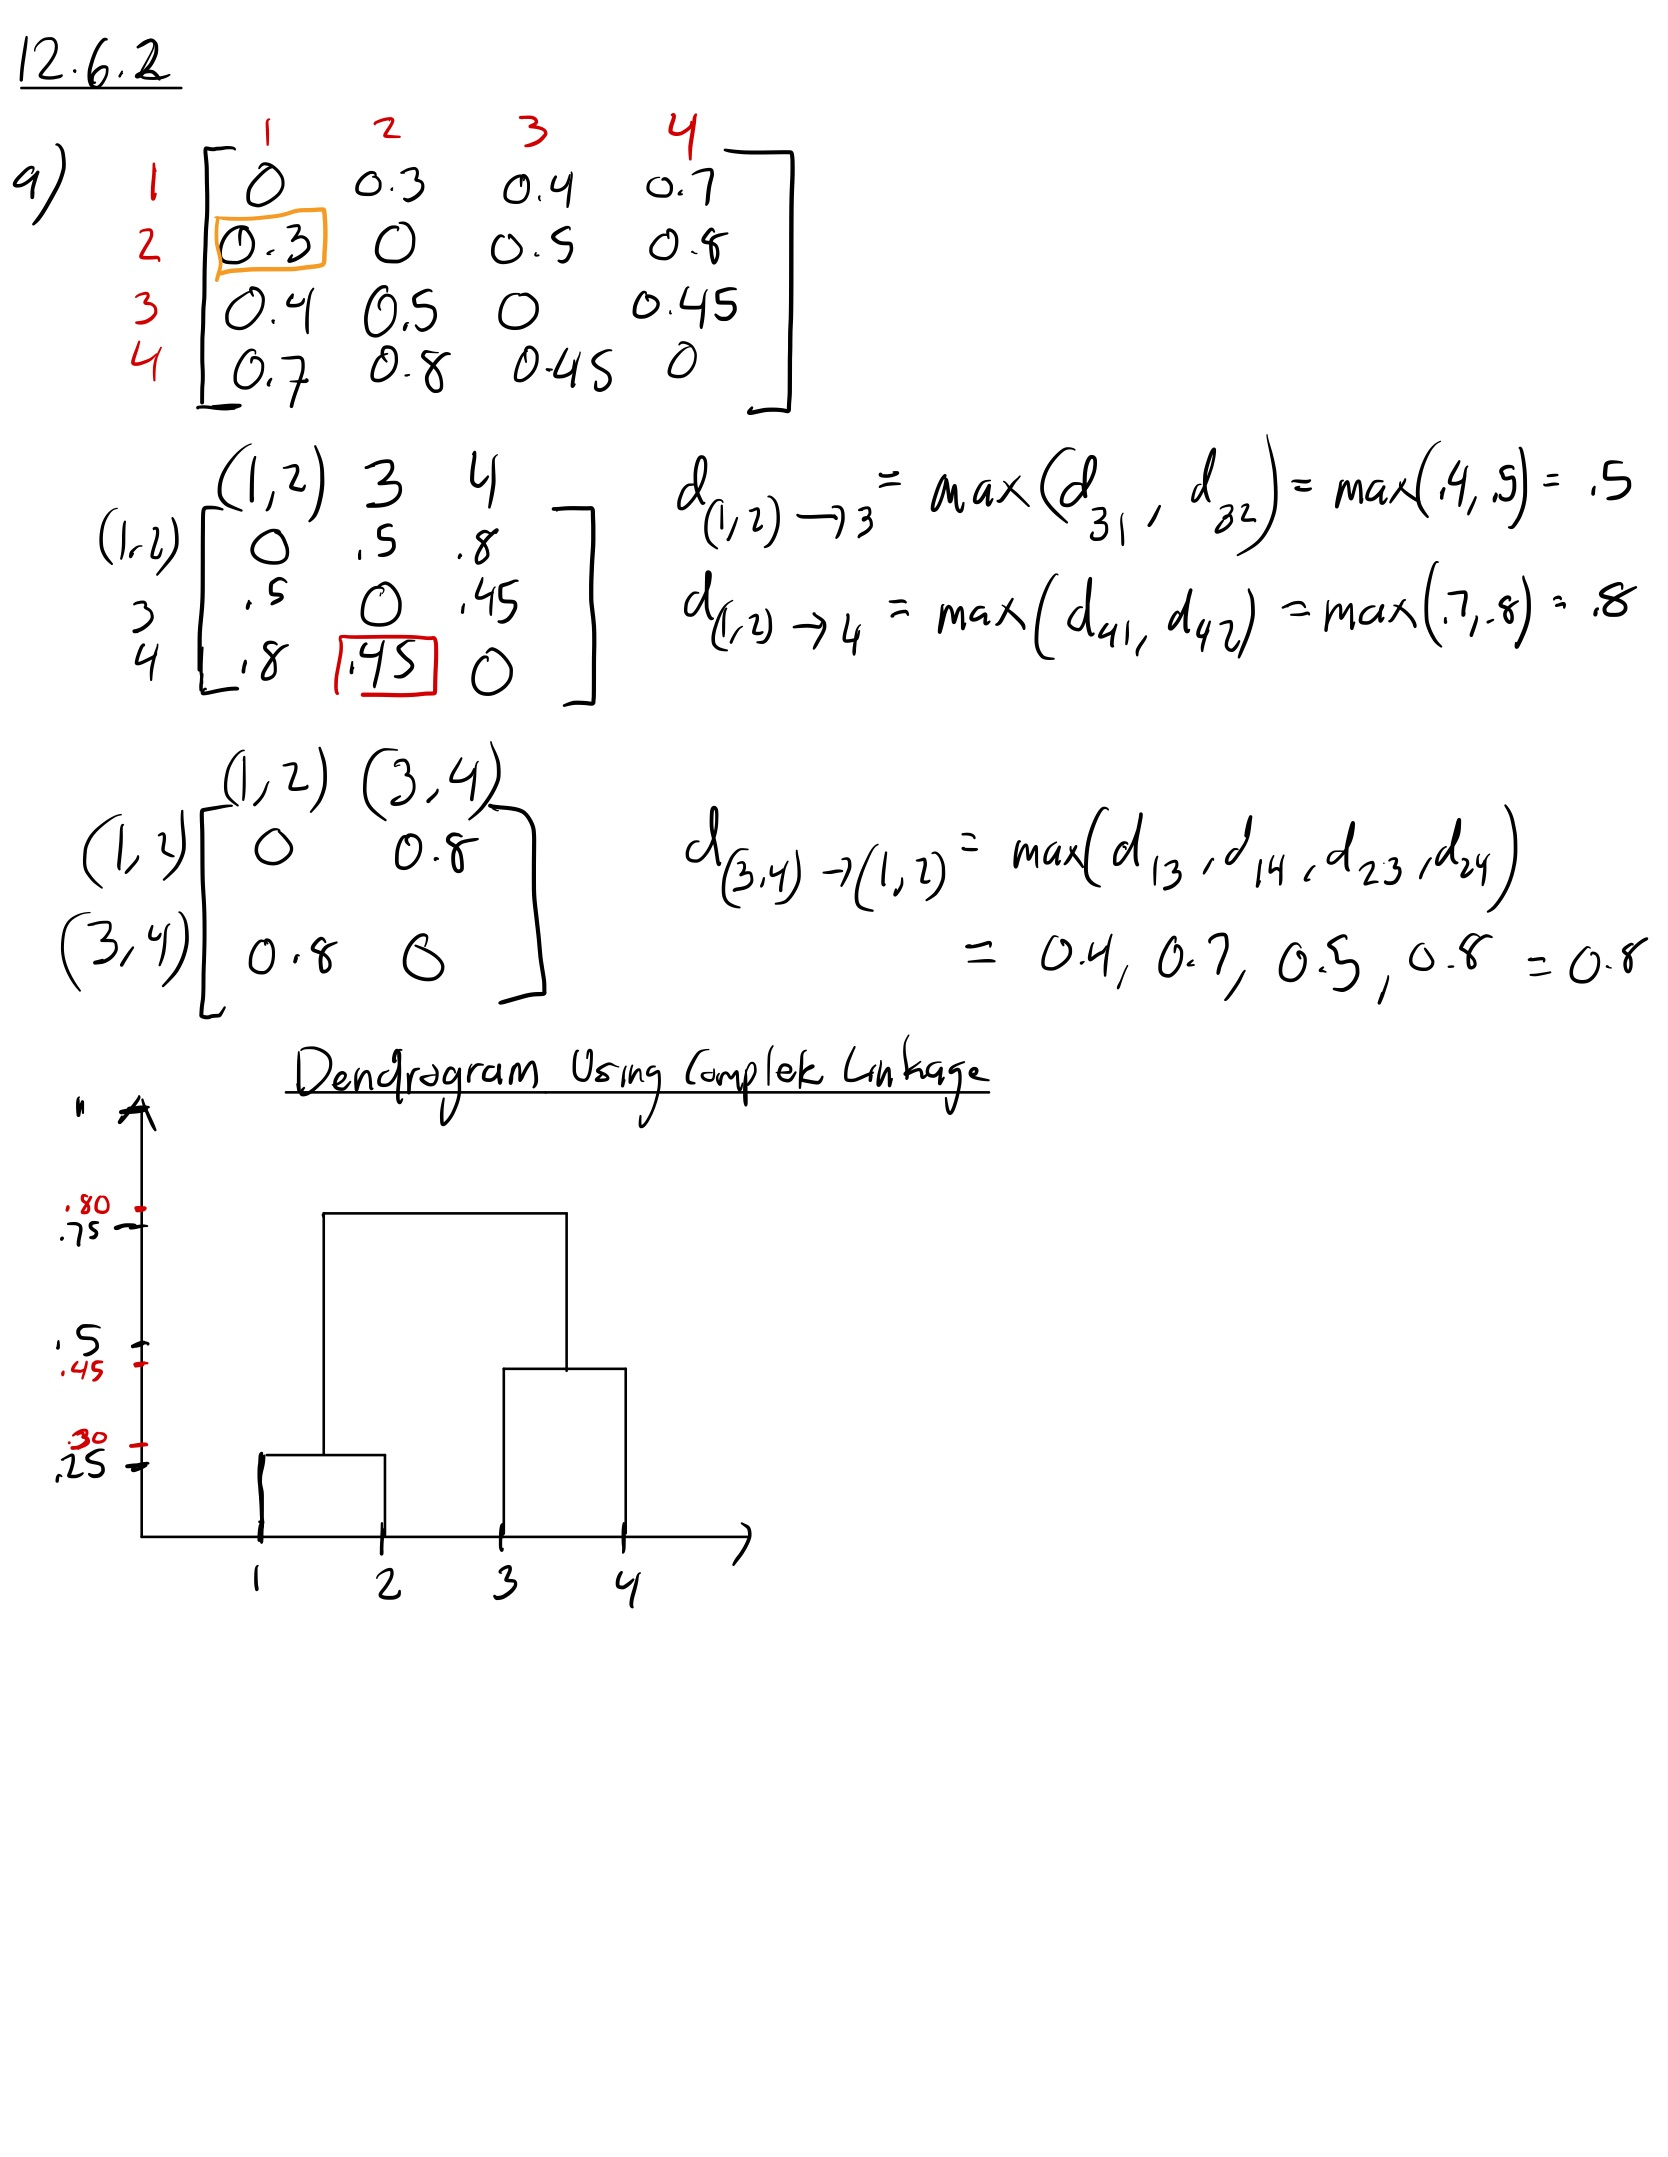

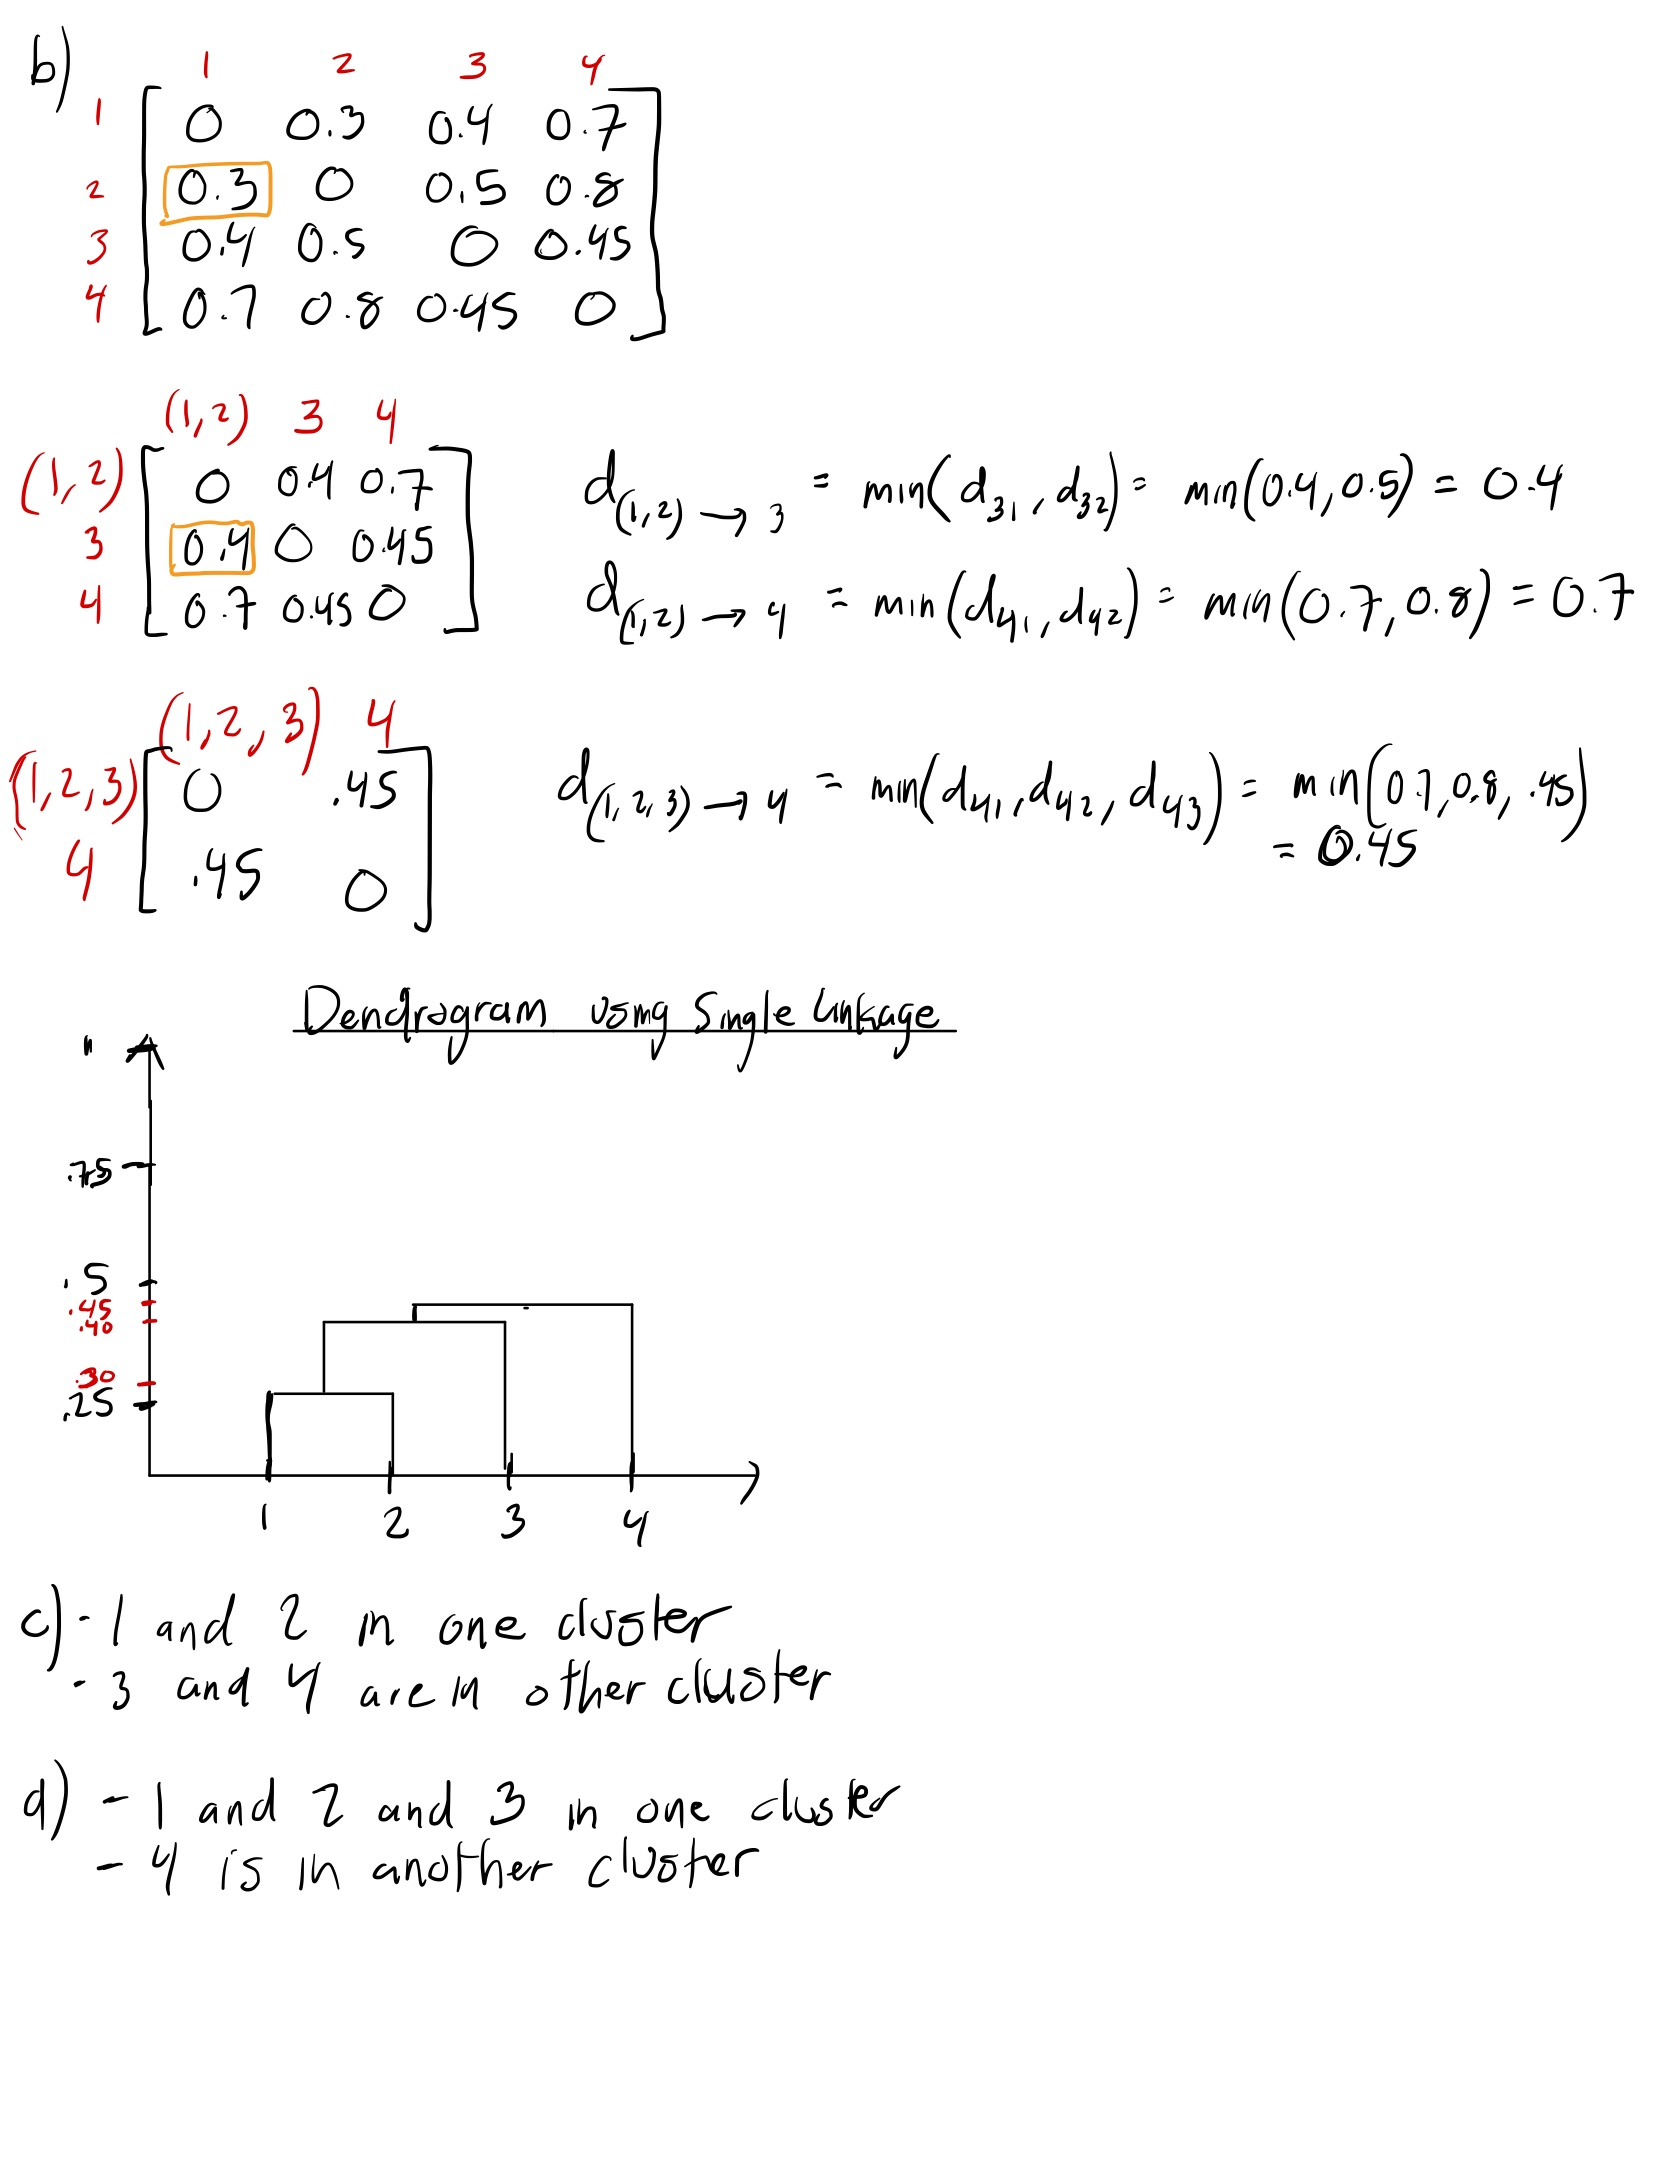

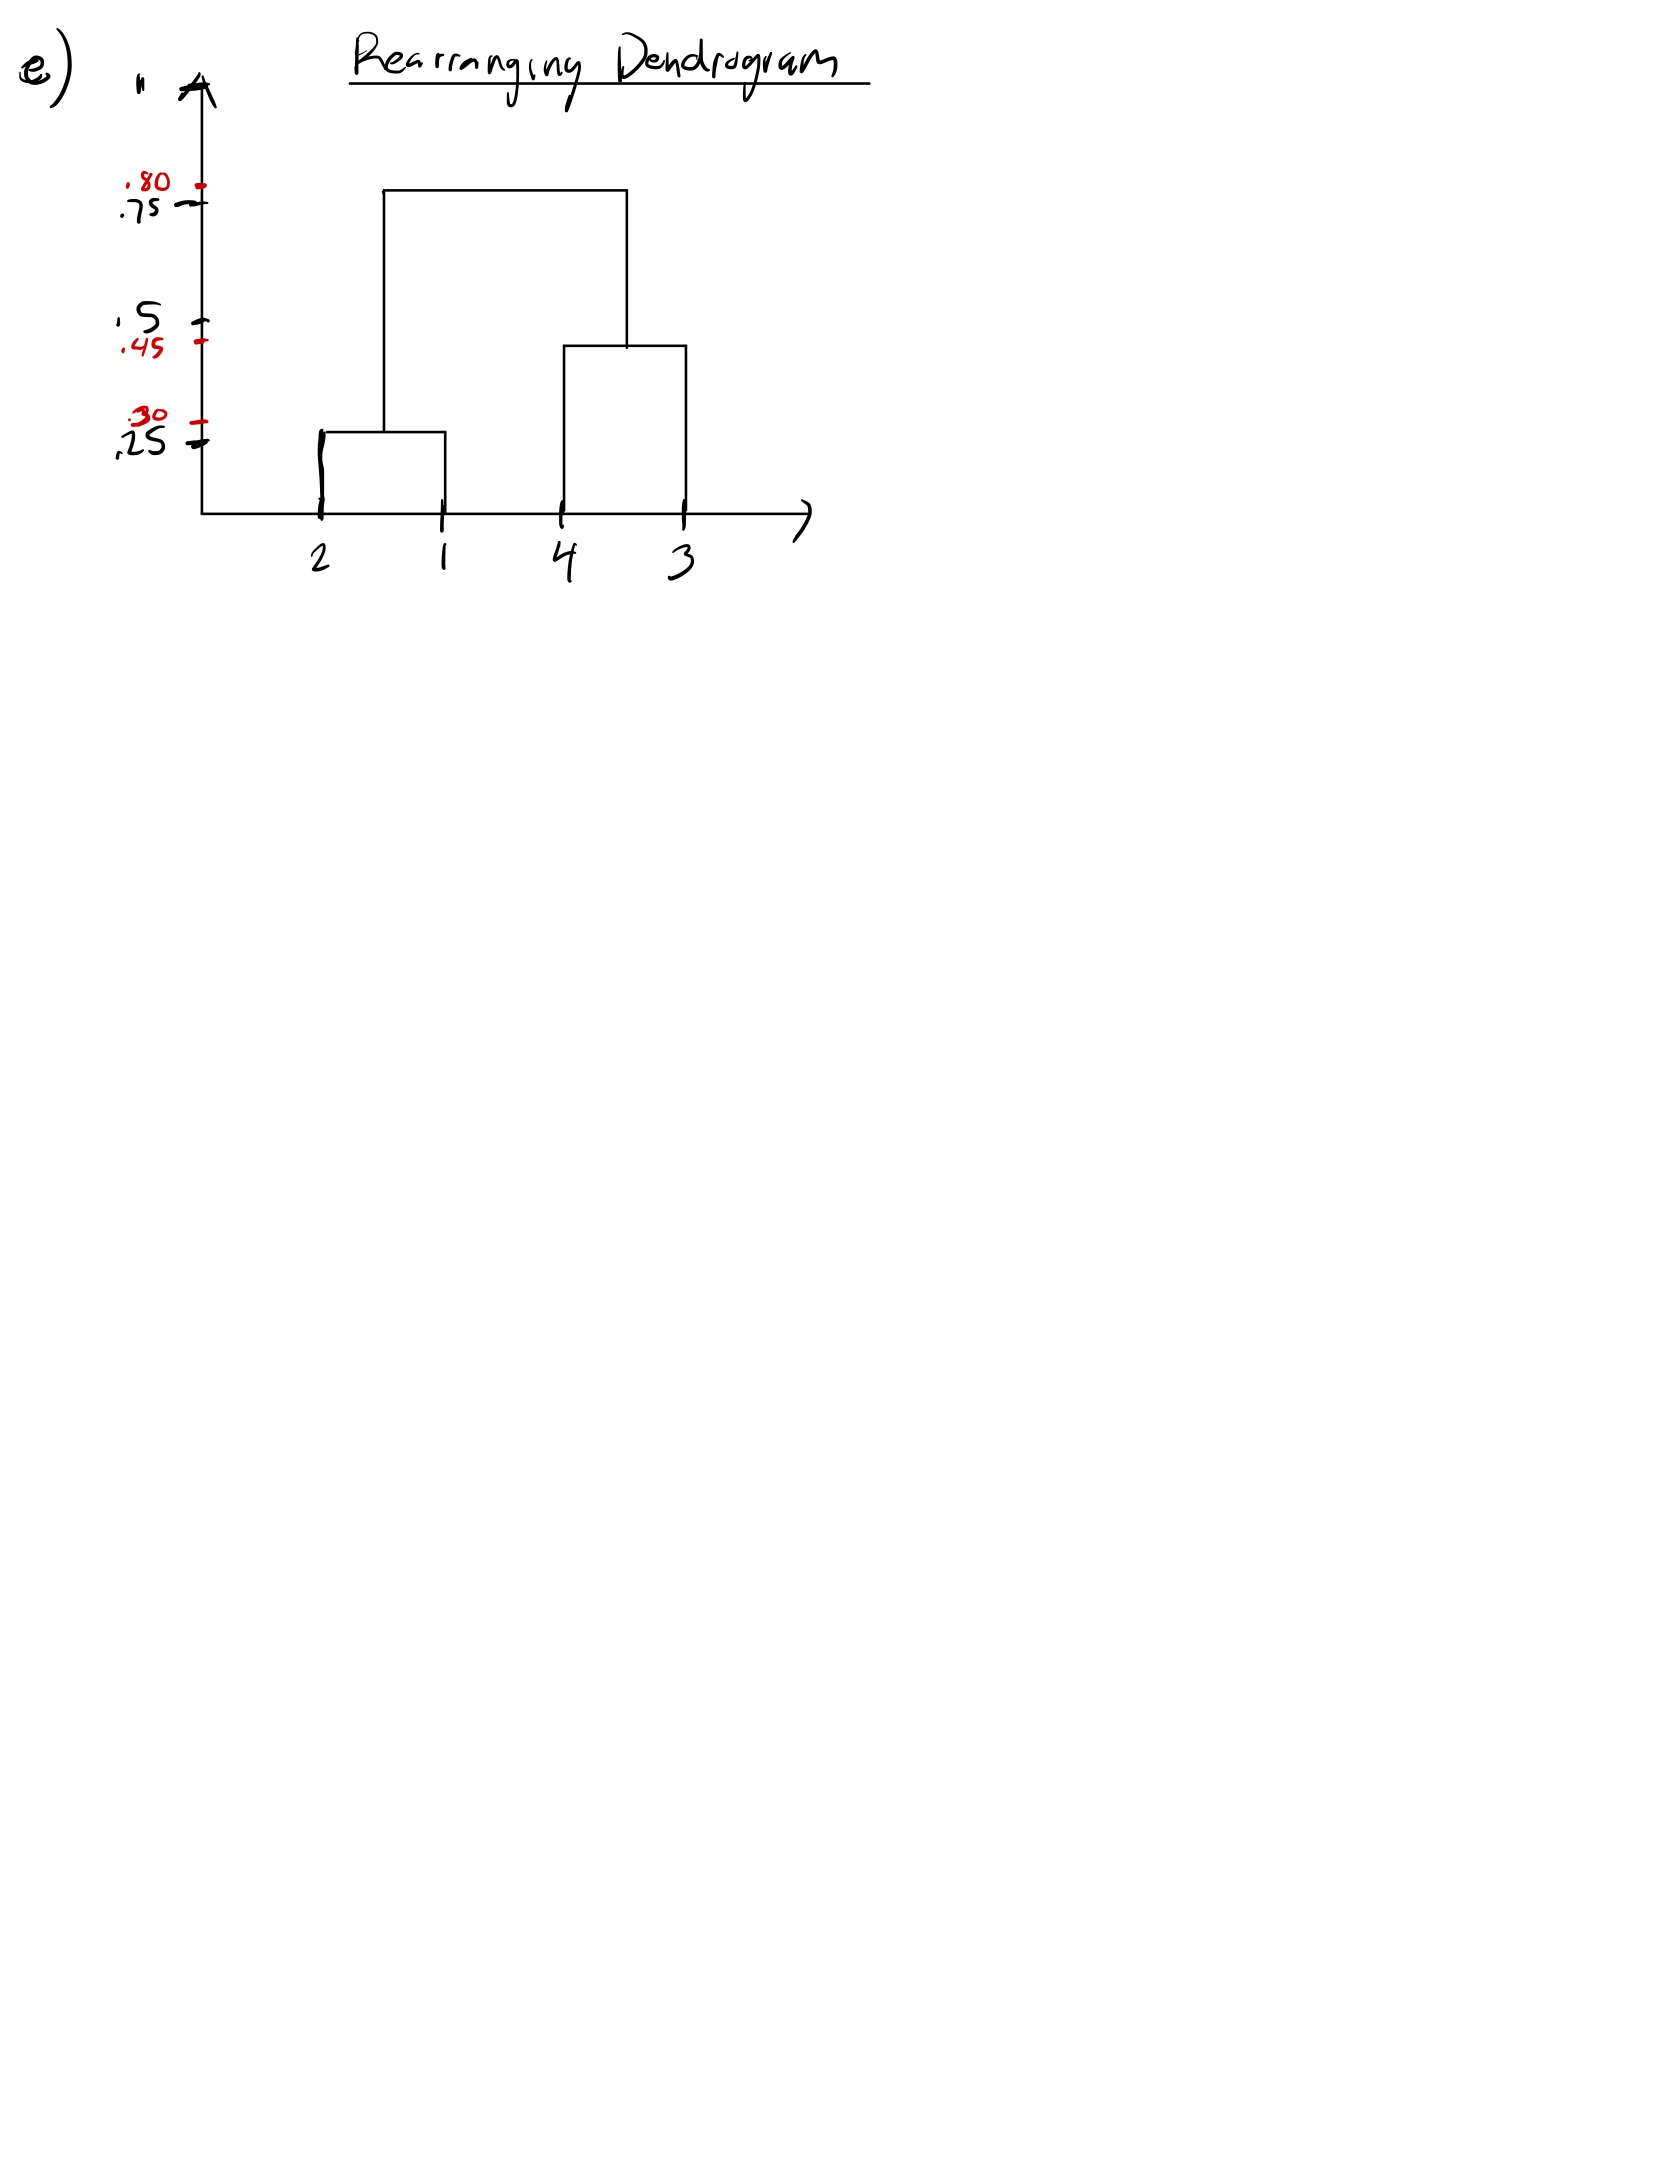